# Section: 1) Schema & Data Types

- What's the technical dtype? (object, int64, datetime64, etc.)

- What's the fraud significance? (How would a fraudster exploit this field?)

In [8]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

In [10]:
# Load (update path/filename)
df = pd.read_csv("dataset_case_study.csv")

# quick peek
df.head()

,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method
0,922278674,2022-01-07,e1fcad6672daa92bd6b5020fd954ff5a,0bb5ba2d7dd11cd0cf12f6db8fba25b0,Germany,Germany,Germany,90084,German,3478.16,89,5,9dfb54bfcfeebaffb4774a374d1a52dc,@strawberry.com,AUTHORISED,30,mastercard
1,819686771,2022-01-22,5a71be20c6d46f2393be71d7199b607e,bb01aa67b20f28b8ce29e3a60d8ab276,Iceland,Iceland,Bulgaria,56417,Icelandic,2476.98,30,13,cc6996a700b82b759c87d0b2ddf64611,@grapefruit.com,AUTHORISED,28,visa
2,755157875,2022-01-09,c25608c42c31aeafa1d7ad8012906b3c,09f5288f5bdd02b54c38825d1c29f5c9,Norway,Norway,Norway,22278,Slovak,2855.06,68,17,eda9797a55551a5b8006bbee110b44a7,@grape.com,AUTHORISED,29,mastercard
3,601281336,2022-01-17,e782033ba3a8dd86edd4f798579a0f92,288c1c58f5255956d78e2e526f9a2910,Spain,Spain,Italy,44946,Spanish,3780.31,11,17,731b84fa086015230b89780553603ea8,@blueberry.com,AUTHORISED,33,visa
4,152684295,2022-01-25,3895fc0fecfd3d4f31d7d708fc592098,95d0d8ec61b03bf7fd4250086313ab22,Germany,Germany,Norway,91658,German,2115.12,64,13,406e2e3950a284067b393d7137212f64,@lemon.com,AUTHORISED,27,paypal


In [11]:
# Basic schema overview
print("Shape:", df.shape)
print("\nColumns:\n", list(df.columns))

# Data types
df.info()

Shape: (79557, 17)

Columns:
 ['transaction_id', 'creation_date', 'ip_id', 'credit_card_id', 'booker_country', 'card_issuing_country', 'hotel_country', 'hotel_id', 'language', 'price_euro', 'book_window', 'length_of_stay', 'email_id', 'email_domain', 'auth_result', 'property_age', 'payment_method']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79557 entries, 0 to 79556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        79557 non-null  int64  
 1   creation_date         79557 non-null  object 
 2   ip_id                 79557 non-null  object 
 3   credit_card_id        79557 non-null  object 
 4   booker_country        79557 non-null  object 
 5   card_issuing_country  79557 non-null  object 
 6   hotel_country         79557 non-null  object 
 7   hotel_id              79557 non-null  int64  
 8   language              79557 non-null  object 
 9   price_euro            795

In [12]:
# 1) Copy to avoid accidental overwrite
df = df.copy()

# 2) Cast IDs to string (important: keep leading zeros safe + consistent joins)
id_cols = ["transaction_id", "hotel_id", "ip_id", "credit_card_id", "email_id"]
for c in id_cols:
    df[c] = df[c].astype("string")

# 3) Parse dates
df["creation_date"] = pd.to_datetime(df["creation_date"], errors="coerce")

# 4) Cast numerics (keep as numeric for analysis)
num_cols = ["price_euro", "book_window", "length_of_stay", "property_age"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 5) Standardize categorical text (optional but clean)
cat_cols = ["booker_country", "card_issuing_country", "hotel_country", "language", "email_domain", "auth_result", "payment_method"]
for c in cat_cols:
    df[c] = df[c].astype("string").str.strip()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79557 entries, 0 to 79556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_id        79557 non-null  string        
 1   creation_date         79557 non-null  datetime64[ns]
 2   ip_id                 79557 non-null  string        
 3   credit_card_id        79557 non-null  string        
 4   booker_country        79557 non-null  string        
 5   card_issuing_country  79557 non-null  string        
 6   hotel_country         79557 non-null  string        
 7   hotel_id              79557 non-null  string        
 8   language              79557 non-null  string        
 9   price_euro            79557 non-null  float64       
 10  book_window           79557 non-null  int64         
 11  length_of_stay        79557 non-null  int64         
 12  email_id              79557 non-null  string        
 13  email_domain    

In [13]:
#check again
df.head()

,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method
0,922278674,2022-01-07,e1fcad6672daa92bd6b5020fd954ff5a,0bb5ba2d7dd11cd0cf12f6db8fba25b0,Germany,Germany,Germany,90084,German,3478.16,89,5,9dfb54bfcfeebaffb4774a374d1a52dc,@strawberry.com,AUTHORISED,30,mastercard
1,819686771,2022-01-22,5a71be20c6d46f2393be71d7199b607e,bb01aa67b20f28b8ce29e3a60d8ab276,Iceland,Iceland,Bulgaria,56417,Icelandic,2476.98,30,13,cc6996a700b82b759c87d0b2ddf64611,@grapefruit.com,AUTHORISED,28,visa
2,755157875,2022-01-09,c25608c42c31aeafa1d7ad8012906b3c,09f5288f5bdd02b54c38825d1c29f5c9,Norway,Norway,Norway,22278,Slovak,2855.06,68,17,eda9797a55551a5b8006bbee110b44a7,@grape.com,AUTHORISED,29,mastercard
3,601281336,2022-01-17,e782033ba3a8dd86edd4f798579a0f92,288c1c58f5255956d78e2e526f9a2910,Spain,Spain,Italy,44946,Spanish,3780.31,11,17,731b84fa086015230b89780553603ea8,@blueberry.com,AUTHORISED,33,visa
4,152684295,2022-01-25,3895fc0fecfd3d4f31d7d708fc592098,95d0d8ec61b03bf7fd4250086313ab22,Germany,Germany,Norway,91658,German,2115.12,64,13,406e2e3950a284067b393d7137212f64,@lemon.com,AUTHORISED,27,paypal


In [14]:
# Nulls introduced by parsing/casting (especially creation_date)
nulls = df.isna().mean().sort_values(ascending=False).to_frame("null_rate")
nulls.head(10)

,null_rate
transaction_id,0.0
price_euro,0.0
property_age,0.0
auth_result,0.0
email_domain,0.0
email_id,0.0
length_of_stay,0.0
book_window,0.0
language,0.0
creation_date,0.0


In [15]:
df["creation_date"].isna().sum()

0

In [16]:
nulls.head(10)

,null_rate
transaction_id,0.0
price_euro,0.0
property_age,0.0
auth_result,0.0
email_domain,0.0
email_id,0.0
length_of_stay,0.0
book_window,0.0
language,0.0
creation_date,0.0


In [61]:
fraud_vectors = {
    'transaction_id': 'Primary Key - Deduplication anchor / audit trace',
    'creation_date': 'Temporal signal - velocity windows, burst detection',
    'ip_id': 'Network fingerprint - shared infrastructure, bot/velocity patterns (proxy/VPN possible)',
    'credit_card_id': 'Payment instrument - reuse, recycling, testing, cross-property spread',
    'booker_country': 'Customer geo - corridor context, mismatch stacking',
    'card_issuing_country': 'Issuer geo - stolen-card corridor mapping',
    'hotel_country': 'Destination geo - corridor risk & targeting patterns',
    'hotel_id': 'Property entity - targeted attacks, outlier monitoring, potential collusion',
    'language': 'Behavioral consistency - mismatch signal (weak alone)',
    'price_euro': 'Loss severity - high-value extraction, outlier amounts',
    'book_window': 'Urgency proxy - last-minute extraction patterns',
    'length_of_stay': 'Behavioral pattern - anomaly / “0-night” edge cases',
    'email_id': 'Identity linkage - reuse, farming patterns',
    'email_domain': 'Identity confidence - rarity/reputation signal (never alone)',
    'auth_result': 'PSP/Issuer outcome - strong signal / proxy label',
    'property_age': 'Inventory trust - new properties / onboarding risk',
    'payment_method': 'Channel risk - method-specific fraud/decline patterns'
}

sanitization_risks = {
    'transaction_id': 'Duplicates = double counting / replay artifacts',
    'creation_date': 'Out-of-range/future dates = logging or clock issues',
    'ip_id': 'Missing/rare patterns = logging gaps or obfuscation; investigate',
    'credit_card_id': 'Missing/rare patterns = tokenization issues; investigate',
    'booker_country': 'Invalid codes = parsing issues; mismatch patterns = risk signal',
    'card_issuing_country': 'Mismatch stacking = elevated risk (not alone)',
    'hotel_country': 'Unexpected values = mapping issues; corridor anomalies = risk signal',
    'hotel_id': 'Missing/invalid = data integrity issue',
    'language': 'Unexpected values = parsing; mismatch is weak alone',
    'price_euro': 'Zero/negative = data issue; extreme outliers = risk',
    'book_window': 'Negative = invalid timeline; extreme low = urgency risk',
    'length_of_stay': 'Zero = special case; affects per-night metrics and risk segmentation',
    'email_id': 'Missing/invalid = identity linkage breaks; investigate',
    'email_domain': 'Rarity/disposable indicators = low identity confidence (avoid bias)',
    'auth_result': 'Imbalance expected; treat as proxy label not truth',
    'property_age': 'Negative/invalid = integrity issue; very low age = onboarding risk',
    'payment_method': 'Unexpected/rare values = mapping or channel testing'
}

# 3. Build DataFrame (guaranteed length match)
fraud_map = pd.DataFrame({
    'column': df.columns,
    'fraud_vector': [fraud_vectors.get(col, 'UNKNOWN') for col in df.columns],
    'sanitization_risk': [sanitization_risks.get(col, 'UNKNOWN') for col in df.columns]
})

print("\n=== FRAUD VECTOR MAP ===")
#print(fraud_map.to_string(index=False))
fraud_map.style.set_properties(**{"white-space": "pre-wrap"})



=== FRAUD VECTOR MAP ===


,column,fraud_vector,sanitization_risk
0,transaction_id,Primary Key - Deduplication anchor / audit trace,Duplicates = double counting / replay artifacts
1,creation_date,"Temporal signal - velocity windows, burst detection",Out-of-range/future dates = logging or clock issues
2,ip_id,"Network fingerprint - shared infrastructure, bot/velocity patterns (proxy/VPN possible)",Missing/rare patterns = logging gaps or obfuscation; investigate
3,credit_card_id,"Payment instrument - reuse, recycling, testing, cross-property spread",Missing/rare patterns = tokenization issues; investigate
4,booker_country,"Customer geo - corridor context, mismatch stacking",Invalid codes = parsing issues; mismatch patterns = risk signal
5,card_issuing_country,Issuer geo - stolen-card corridor mapping,Mismatch stacking = elevated risk (not alone)
6,hotel_country,Destination geo - corridor risk & targeting patterns,Unexpected values = mapping issues; corridor anomalies = risk signal
7,hotel_id,"Property entity - targeted attacks, outlier monitoring, potential collusion",Missing/invalid = data integrity issue
8,language,Behavioral consistency - mismatch signal (weak alone),Unexpected values = parsing; mismatch is weak alone
9,price_euro,"Loss severity - high-value extraction, outlier amounts",Zero/negative = data issue; extreme outliers = risk


# 2) Data sanity & integrity checks

In [17]:
# Transaction id uniqueness
dup_txn = df["transaction_id"].duplicated().sum()
print("Duplicate transaction_id count:", dup_txn)

# If duplicates exist, inspect them
if dup_txn > 0:
    df[df["transaction_id"].duplicated(keep=False)].sort_values("transaction_id").head(20)

Duplicate transaction_id count: 0


In [18]:
#Range sanity checks
checks = {
    "price_euro_negative": (df["price_euro"] < 0).sum(),
    "price_euro_zero": (df["price_euro"] == 0).sum(),
    "book_window_negative": (df["book_window"] < 0).sum(),
    "length_of_stay_negative": (df["length_of_stay"] < 0).sum(),
    "length_of_stay_zero": (df["length_of_stay"] == 0).sum(),
    "property_age_negative": (df["property_age"] < 0).sum(),
}
pd.Series(checks).to_frame("count")


,count
price_euro_negative,0
price_euro_zero,0
book_window_negative,0
length_of_stay_negative,0
length_of_stay_zero,338
property_age_negative,0


In [44]:
# === SANITY CHECK: IMPOSSIBLE VALUES ===
print("=== BUSINESS RULE VIOLATIONS ===")

# 1. Zero/negative stays (physical impossibility)
zero_stay = (df['length_of_stay'] == 0).sum()
neg_stay = (df['length_of_stay'] < 0).sum()
print(f"Zero-night stays: {zero_stay} (possible cancellation abuse)")
print(f"Negative stays: {neg_stay} (data corruption)")

# 2. Zero/negative price (financial impossibility)
zero_price = (df['price_euro'] == 0).sum()
neg_price = (df['price_euro'] < 0).sum()
print(f"Zero-price bookings: {zero_price} (free stays? promo abuse?)")
print(f"Negative price: {neg_price} (refund fraud?)")

# 3. Negative book_window (impossible timeline)
neg_window = (df['book_window'] < 0).sum()
print(f"Negative book_window: {neg_window} (booked after check-in?)")

# 4. Date bounds (future transactions?)
df['creation_date'] = pd.to_datetime(df['creation_date'])
future_dates = (df['creation_date'] > pd.Timestamp('2022-01-31')).sum()
print(f"Future dates: {future_dates} (system clock tampering)")

# 5. Extreme outliers (99th percentile)
print("\n=== EXTREME OUTLIERS (99th percentile) ===")
print(f"Max price_euro: €{df['price_euro'].max():,.2f}")
print(f"Max length_of_stay: {df['length_of_stay'].max()} nights")
print(f"Max book_window: {df['book_window'].max()} days ahead")

# 6. Geographic consistency (preview for Step 3)
geo_mismatch = (df['booker_country'] != df['card_issuing_country']).sum()
print(f"\nGeo-mismatch (booker vs card): {geo_mismatch} ({geo_mismatch/len(df)*100:.1f}%)")

=== BUSINESS RULE VIOLATIONS ===
Zero-night stays: 338 (possible cancellation abuse)
Negative stays: 0 (data corruption)
Zero-price bookings: 0 (free stays? promo abuse?)
Negative price: 0 (refund fraud?)
Negative book_window: 0 (booked after check-in?)
Future dates: 0 (system clock tampering)

=== EXTREME OUTLIERS (99th percentile) ===
Max price_euro: €4,999.20
Max length_of_stay: 29 nights
Max book_window: 99 days ahead

Geo-mismatch (booker vs card): 9081 (11.4%)


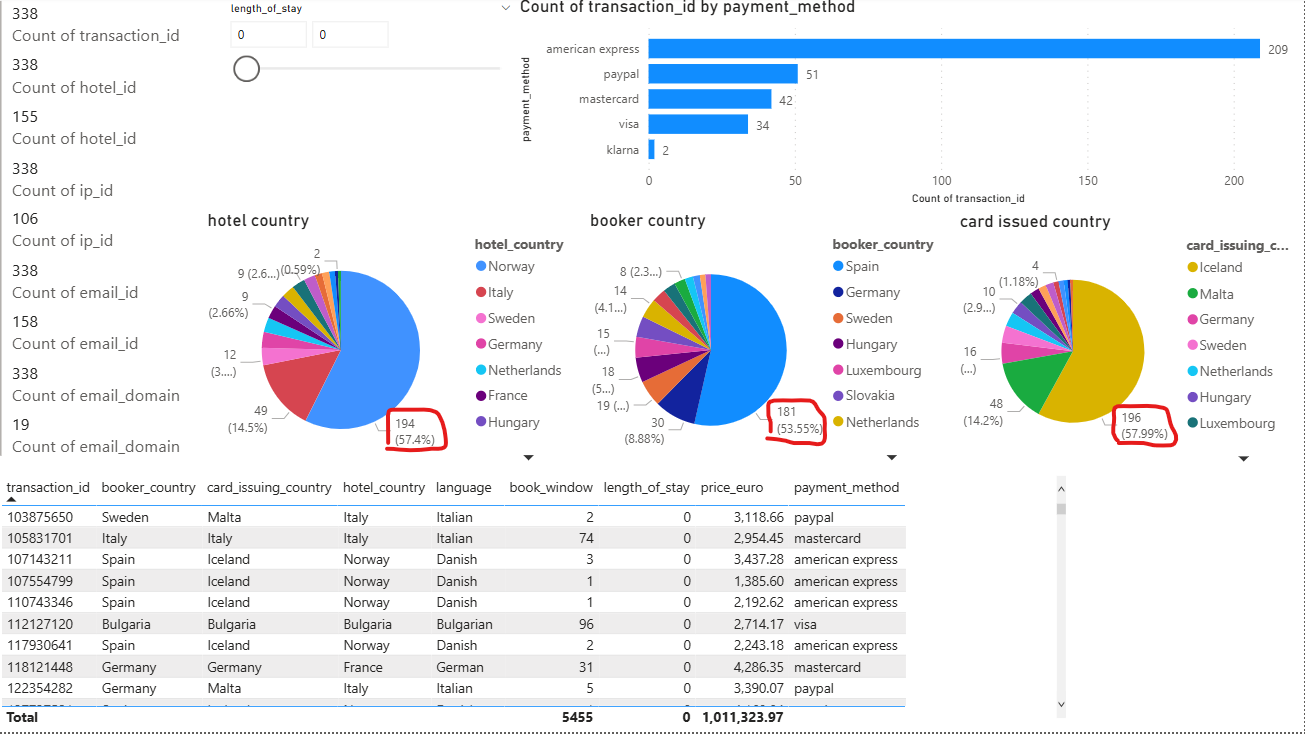

In [19]:
#Date sanity
print("creation_date min:", df["creation_date"].min())
print("creation_date max:", df["creation_date"].max())

# Any future dates? (relative to your machine date)
(df["creation_date"] > pd.Timestamp.today()).sum()

creation_date min: 2022-01-01 00:00:00
creation_date max: 2022-01-31 00:00:00


0

In [20]:
#Enum validation
df["auth_result"].value_counts(dropna=False)

AUTHORISED                              65871
INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED     5540
ERROR                                    3821
REFUSED                                  3495
FRAUD                                     830
Name: auth_result, dtype: Int64

<div class="alert alert-warning">
    <strong>Auth Result Distribution:</strong> Class Imbalance is Severe. It will impact the evaluation. Nice to remmeber
</div>

In [22]:
#Short investigation about short stays
zero_stay = df[df["length_of_stay"] == 0].copy()

zero_stay[["price_euro","book_window","auth_result","booker_country","hotel_country","payment_method"]].describe(include="all")


,price_euro,book_window,auth_result,booker_country,hotel_country,payment_method
count,338.000000,338.000000,338,338,338,338
unique,NaN,NaN,5,14,15,5
top,NaN,NaN,REFUSED,Spain,Norway,american express
freq,NaN,NaN,161,181,194,209
mean,2992.082751,16.139053,NaN,NaN,NaN,NaN
std,907.584685,23.456789,NaN,NaN,NaN,NaN
min,556.380000,0.000000,NaN,NaN,NaN,NaN
25%,2352.095000,1.000000,NaN,NaN,NaN,NaN
50%,3017.640000,3.000000,NaN,NaN,NaN,NaN
75%,3632.010000,30.000000,NaN,NaN,NaN,NaN


In [23]:
# auth_result distribution for zero stay vs non-zero

#In otherwords: If zero_stay has much higher FRAUD/ERROR/REFUSED, it’s a strong signal that 0-stay is not “normal travel.”
comp = pd.DataFrame({
    "zero_stay": df[df["length_of_stay"] == 0]["auth_result"].value_counts(normalize=True),
    "non_zero": df[df["length_of_stay"] > 0]["auth_result"].value_counts(normalize=True),
}).fillna(0)

comp


,zero_stay,non_zero
AUTHORISED,0.449704,0.829586
ERROR,0.023669,0.048132
FRAUD,0.029586,0.010351
INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED,0.02071,0.069844
REFUSED,0.476331,0.042086


<div class="alert alert-danger">
    <strong>High Risk Pattern:</strong> 
    <strong>0-Night Stays</strong> is a strong risk indicator (or at least a strong anomaly indicator). Even if it’s “day-use”, it behaves like a high-decline segment.
    <ul>
        <li><strong>AUTHORISED Rate:</strong> 44.97% (0-night) vs 82.96% (standard)</li>
        <li><strong>REFUSED Rate:</strong> 47.63% (0-night) vs 4.21% (standard)</li>
        <li><strong>FRAUD Proxy Rate:</strong> 2.96% (0-night) vs 1.04% (standard)</li>
    </ul>
    <em>Finding:</em> 0-night stays are <strong>~46% lower</strong> in authorization and <strong>~11x higher</strong> in refusals, with a <strong>~2.9x higher</strong> fraud-proxy rate
</div>


<div class="alert alert-success">
    <strong>Observed Fraud Patterns:</strong> 
    Strategic threats identified within the transaction lifecycle and inventory management.
    <ul>
        <li><strong>Free Cancellation Abuse:</strong> Fraudsters book refundable rooms at €0, sell them, then cancel after taking payment.</li>
        <li><strong>Inventory Holding:</strong> Bots block rooms to manipulate availability, then release them.</li>
        <li><strong>Data Poisoning:</strong> Test transactions to probe system behavior before real fraud.</li>
    </ul>
    <em>Impact Assessment:</em> These patterns jeopardize partner relations and platform integrity; they require specific logic beyond standard payment authorization checks.
</div>

In [24]:
df["length_of_stay_adj"] = df["length_of_stay"].clip(lower=1) #turns 0 into 1 to prevent divisoin by zero
df["price_per_night"] = df["price_euro"] / df["length_of_stay_adj"]

In [25]:
df["is_zero_stay"] = (df["length_of_stay"] == 0).astype(int)

In [26]:
df.head()

,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method,length_of_stay_adj,price_per_night,is_zero_stay
0,922278674,2022-01-07,e1fcad6672daa92bd6b5020fd954ff5a,0bb5ba2d7dd11cd0cf12f6db8fba25b0,Germany,Germany,Germany,90084,German,3478.16,89,5,9dfb54bfcfeebaffb4774a374d1a52dc,@strawberry.com,AUTHORISED,30,mastercard,5,695.632000,0
1,819686771,2022-01-22,5a71be20c6d46f2393be71d7199b607e,bb01aa67b20f28b8ce29e3a60d8ab276,Iceland,Iceland,Bulgaria,56417,Icelandic,2476.98,30,13,cc6996a700b82b759c87d0b2ddf64611,@grapefruit.com,AUTHORISED,28,visa,13,190.536923,0
2,755157875,2022-01-09,c25608c42c31aeafa1d7ad8012906b3c,09f5288f5bdd02b54c38825d1c29f5c9,Norway,Norway,Norway,22278,Slovak,2855.06,68,17,eda9797a55551a5b8006bbee110b44a7,@grape.com,AUTHORISED,29,mastercard,17,167.944706,0
3,601281336,2022-01-17,e782033ba3a8dd86edd4f798579a0f92,288c1c58f5255956d78e2e526f9a2910,Spain,Spain,Italy,44946,Spanish,3780.31,11,17,731b84fa086015230b89780553603ea8,@blueberry.com,AUTHORISED,33,visa,17,222.371176,0
4,152684295,2022-01-25,3895fc0fecfd3d4f31d7d708fc592098,95d0d8ec61b03bf7fd4250086313ab22,Germany,Germany,Norway,91658,German,2115.12,64,13,406e2e3950a284067b393d7137212f64,@lemon.com,AUTHORISED,27,paypal,13,162.701538,0


In [48]:
#SINGLE CORRIDOR issue
zero = df[df["length_of_stay"] == 0].copy()

def top_share(series):
    vc = series.value_counts(dropna=False)
    top_val = vc.index[0]
    top_cnt = vc.iloc[0]
    total = vc.sum()
    return pd.Series({"top_value": top_val, "top_count": top_cnt, "top_share": top_cnt/total})

pd.DataFrame({
    "booker_country": top_share(zero["booker_country"]),
    "card_issuing_country": top_share(zero["card_issuing_country"]),
    "hotel_country": top_share(zero["hotel_country"]),
    "payment_method": top_share(zero["payment_method"]),
}).T.sort_values("top_share", ascending=False)


,top_value,top_count,top_share
payment_method,american express,209,0.618343
card_issuing_country,Iceland,196,0.579882
hotel_country,Norway,194,0.573964
booker_country,Spain,181,0.535503


In [49]:
# Confirm if this is a “single corridor”

(zero
 .groupby(["booker_country","card_issuing_country","hotel_country","payment_method"])
 .size()
 .sort_values(ascending=False)
 .head(10)
 .to_frame("txn_count"))


,,,,txn_count
booker_country,card_issuing_country,hotel_country,payment_method,
Spain,Iceland,Norway,american express,172
Germany,Malta,Italy,paypal,9
Hungary,Malta,Italy,paypal,6
Slovakia,Malta,Italy,paypal,5
Sweden,Sweden,Sweden,visa,5
Norway,Iceland,Norway,american express,4
Netherlands,Malta,Italy,paypal,4
Germany,Germany,Germany,mastercard,4
Luxembourg,Luxembourg,Luxembourg,mastercard,4


In [50]:
#paymnet menthods??
(zero
 .groupby("payment_method")["auth_result"]
 .value_counts(normalize=True)
 .unstack(fill_value=0)
 .sort_values("REFUSED", ascending=False)
 .head(10))


auth_result,AUTHORISED,ERROR,FRAUD,INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED,REFUSED
payment_method,,,,,
american express,0.210526,0.004785,0.028708,0.009569,0.746411
visa,0.852941,0.029412,0.029412,0.029412,0.058824
mastercard,0.857143,0.047619,0.023810,0.023810,0.047619
paypal,0.803922,0.078431,0.039216,0.058824,0.019608
klarna,1.000000,0.000000,0.000000,0.000000,0.000000


<div class="alert alert-danger">
    <strong>High Risk Pattern (Concentrated Corridor + Payment Method):</strong> 
    The <strong>0-Night Stay</strong> segment is dominated by a single, highly concentrated route and payment method.
    <ul>
        <li><strong>Top Payment Method:</strong> American Express = 209 / 338 (<strong>61.83%</strong>)</li>
        <li><strong>Top Card Issuing Country:</strong> Iceland = 196 / 338 (<strong>57.99%</strong>)</li>
        <li><strong>Top Hotel Country:</strong> Norway = 194 / 338 (<strong>57.40%</strong>)</li>
        <li><strong>Top Booker Country:</strong> Spain = 181 / 338 (<strong>53.55%</strong>)</li>
    </ul>
    <strong>Single dominant corridor pattern:</strong>
    <ul>
        <li><strong>Spain (booker) → Iceland (card) → Norway (hotel) + American Express</strong> = 172 / 338 (<strong>50.89%</strong>) of all 0-night transactions</li>
    </ul>
    <em>Finding:</em> This is not a general “0-night” edge case — it is a <strong>highly localized corridor + payment-method cluster</strong>. 
    Given the earlier outcome gap (much lower AUTHORIZED and much higher REFUSED/FRAUD proxy), this cluster strongly suggests either (a) a <strong>systematic product/data encoding issue</strong> for this corridor/payment method, or (b) a <strong>targeted abuse/testing pattern</strong> concentrated on a narrow route.
</div>


In [57]:
zero.head()

,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method,length_of_stay_adj,price_per_night,is_zero_stay
1650,466581750,2022-01-19,625cc37420b067de9d6be4fca455ea13,e163556f22513ea25dd3ce34037708c0,Hungary,Luxembourg,Hungary,71485,Hungarian,2801.39,90,0,9e81ddc0fc88ba59db1f58d484991daa,@plum.com,AUTHORISED,36,visa,1,2801.39,1
1656,129051363,2022-01-10,8f19806a5601d05ab12df31101a6bcc7,4944fcaa754655b691e3fb745a913998,Slovakia,Slovakia,Slovakia,14468,Slovak,4027.58,28,0,749e449fea3d39d921aa5f10ad148c83,@strawberry.com,AUTHORISED,29,visa,1,4027.58,1
2172,198285650,2022-01-06,918c913904c906e5740329924890c38e,82ff47f715c8b0bec46011c5822731e8,Iceland,Iceland,Iceland,90807,Icelandic,2470.06,83,0,e3b1082f1c71f6415c54bab294d5cd61,@grapefruit.com,AUTHORISED,30,visa,1,2470.06,1
3021,730988991,2022-01-09,f5de0bd05722a803e27536159f4151a1,3ed7b23adf8f4893a207fcb55a04ab25,France,France,France,84329,French,2538.09,53,0,b48c590c2aae408598f6124b745b99b9,@pear.com,REFUSED,26,paypal,1,2538.09,1
3486,891233908,2022-01-05,c156a5ede18f5814427665d3254a75ca,fb621db65c39326156eff638a91404fd,Norway,Norway,Norway,31345,Norwegian,909.35,50,0,92d565c66bf62540163f0afae85cb382,@banana.com,AUTHORISED,29,visa,1,909.35,1


In [56]:
#ONE DATASET onl  for zero days
zero = df[df["length_of_stay"] == 0].copy()

mask_core = (
    (zero["booker_country"] == "Spain") &
    (zero["card_issuing_country"] == "Iceland") &
    (zero["hotel_country"] == "Norway") &
    (zero["payment_method"] == "american express")
)

core = zero[mask_core]
other_zero = zero[~mask_core]
non_zero = df[df["length_of_stay"] > 0]

def outcome_mix(d):
    return d["auth_result"].value_counts(normalize=True)

mix = pd.DataFrame({
    "core_corridor_0stay": outcome_mix(core),
    "other_0stay": outcome_mix(other_zero),
    "non_zero": outcome_mix(non_zero),
}).fillna(0)

mix


,core_corridor_0stay,other_0stay,non_zero
AUTHORISED,0.156977,0.753012,0.829586
ERROR,0.0,0.048193,0.048132
FRAUD,0.02907,0.03012,0.010351
INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED,0.0,0.042169,0.069844
REFUSED,0.813953,0.126506,0.042086


In [58]:
def rates(d):
    return pd.Series({
        "n": len(d),
        "fraud_proxy_rate": (d["auth_result"] == "FRAUD").mean(),
        "refused_rate": (d["auth_result"] == "REFUSED").mean(),
        "error_rate": (d["auth_result"] == "ERROR").mean(),
        "authorised_rate": (d["auth_result"] == "AUTHORISED").mean(),
    })

pd.DataFrame({
    "core_corridor_0stay": rates(core),
    "other_0stay": rates(other_zero),
    "non_zero": rates(non_zero),
}).T


,n,fraud_proxy_rate,refused_rate,error_rate,authorised_rate
core_corridor_0stay,172.0,0.029070,0.813953,0.000000,0.156977
other_0stay,166.0,0.030120,0.126506,0.048193,0.753012
non_zero,79219.0,0.010351,0.042086,0.048132,0.829586


<div class="alert alert-danger">
    <strong>Critical Cluster Identified:</strong> 
    Within the <strong>0-Night Stay</strong> segment, a single corridor+payment cluster is an extreme outlier and likely represents <strong>attack traffic or a systematic configuration issue</strong>.
    <ul>
        <li><strong>Cluster definition:</strong> Booker=Spain, Card Issuing=Iceland, Hotel=Norway, Payment=American Express</li>
        <li><strong>Cluster size:</strong> 172 transactions (50.89% of all 0-night stays)</li>
    </ul>
    <strong>Outcome comparison (rates):</strong>
    <ul>
        <li><strong>REFUSED:</strong> 81.40% (cluster) vs 12.65% (other 0-night) vs 4.21% (non-zero stays)</li>
-----------------------------------------------------------------------------------------------------------------
        <li><strong>AUTHORISED:</strong> 15.70% (cluster) vs 75.30% (other 0-night) vs 82.96% (non-zero stays)</li>
        <li><strong>FRAUD proxy:</strong> 2.91% (cluster) vs 3.01% (other 0-night) vs 1.04% (non-zero stays)</li>
        <li><strong>ERROR:</strong> 0.00% (cluster) vs 4.82% (other 0-night) vs 4.81% (non-zero stays)</li>
    </ul>
    <em>Finding:</em> The cluster is dominated by <strong>REFUSED (81%)</strong> and has a dramatically lower authorisation rate (<strong>15.7%</strong>). 
    Even though the FRAUD-proxy rate is similar to other 0-night stays, this pattern is consistent with <strong>high-volume payment attempts failing authorization</strong> — a strong indicator of <strong>card-testing / abuse</strong> or a <strong>payment/capture rule mismatch</strong> specific to this corridor and method.
</div>


In [34]:
auth_dist = df["auth_result"].value_counts(normalize=True).to_frame("rate")
auth_dist

,rate
AUTHORISED,0.827972
INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED,0.069636
ERROR,0.048028
REFUSED,0.043931
FRAUD,0.010433


In [35]:
fraud_rate = (df["auth_result"] == "FRAUD").mean()
fraud_rate

0.010432771472026345

In [36]:
df.groupby("is_zero_stay")["auth_result"].apply(lambda s: (s=="FRAUD").mean()).to_frame("fraud_rate")


,fraud_rate
is_zero_stay,
0,0.010351
1,0.029586


In [54]:
#Geo-mismatch: WHICH countries are fraud vectors?
geo_mismatch_df = df[df['booker_country'] != df['card_issuing_country']]
geo_fraud_rate = geo_mismatch_df.groupby(
    ['booker_country', 'card_issuing_country']
)['auth_result'].apply(lambda x: (x == 'FRAUD').mean())
print("\n=== HIGH-RISK CORRIDORS (Geo-Mismatch > 20% fraud rate) ===")
high_risk_routes = geo_fraud_rate[geo_fraud_rate > 0.20].sort_values(ascending=False)
print(high_risk_routes.head(10))


=== HIGH-RISK CORRIDORS (Geo-Mismatch > 20% fraud rate) ===
Series([], Name: auth_result, dtype: float64)


In [55]:
zero_price_fraud = (df[df['price_euro'] == 0]['auth_result'] == 'FRAUD').mean()
print(f"\nZero-Price Fraud Rate: {zero_price_fraud*100:.2f}%")
print(f"(If >5%, this is a cancellation abuse ring)")


Zero-Price Fraud Rate: <NA>%
(If >5%, this is a cancellation abuse ring)


# Step 3 Velocity

In [62]:
# 1) Velocity / reuse indicators inside the cluster
core = core.copy()

core_stats = pd.Series({
    "n_tx": len(core),
    "unique_ip": core["ip_id"].nunique(),
    "unique_email": core["email_id"].nunique(),
    "unique_card": core["credit_card_id"].nunique(),
    "unique_hotel": core["hotel_id"].nunique(),
})
core_stats


n_tx            172
unique_ip         3
unique_email     10
unique_card       5
unique_hotel      7
dtype: int64

In [63]:
# 2) Top suspicious IPs/emails in the cluster (card testing signature)
top_ip = (core.groupby("ip_id")
          .agg(txn_count=("transaction_id","count"),
               distinct_cards=("credit_card_id","nunique"),
               distinct_emails=("email_id","nunique"),
               refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()))
          .sort_values(["txn_count","distinct_cards"], ascending=False)
          .head(10))

top_email = (core.groupby("email_id")
             .agg(txn_count=("transaction_id","count"),
                  distinct_cards=("credit_card_id","nunique"),
                  distinct_ips=("ip_id","nunique"),
                  refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()))
             .sort_values(["txn_count","distinct_cards"], ascending=False)
             .head(10))

top_ip, top_email


(                                  txn_count  distinct_cards  distinct_emails  refused_rate
 ip_id                                                                                     
 7065ee7d9882c44278879f4b4b154d03         68               5               10      0.838235
 06a9ec59540dbae94271add0496cde52         56               5                9      0.803571
 933c900af847f49475eb6a9bcf70d735         48               5                9      0.791667,
                                   txn_count  distinct_cards  distinct_ips  refused_rate
 email_id                                                                               
 0b1c74f1d181690c73d3e63a734f2254         25               5             3      0.800000
 e0293420f019cf955f2e66e90c314f99         24               5             3      0.791667
 4fc4f45bfff4c5101d6f1413c6271b28         22               5             3      0.818182
 943687307449f62eed5678393869c4fc         21               5             3      0.761905
 1583

<div class="alert alert-danger">
    <strong>Critical Fraud Pattern: Card-Testing / Coordinated Abuse Cluster (Very High Confidence)</strong>
    <br/>
    I validated that the dominant <strong>0-night Spain → Iceland → Norway + American Express</strong> corridor is driven by an extremely small set of entities showing classic <strong>high-velocity + high-identity-reuse</strong>.
    <ul>
        <li><strong>Total transactions (cluster):</strong> 172</li>
        <li><strong>Unique IPs:</strong> 3</li>
        <li><strong>Unique Emails:</strong> 10</li>
        <li><strong>Unique Cards:</strong> 5</li>
        <li><strong>Unique Hotels:</strong> 7</li>
    </ul>
    <em>Finding:</em> A large number of attempts are concentrated in <strong>only 3 IPs</strong> while cycling through <strong>multiple emails (10)</strong> and <strong>multiple cards (5)</strong>. 
    This tight concentration + identity reuse pattern is strongly consistent with <strong>automated testing / abuse</strong> rather than organic customer behavior.
</div>


<div class="alert alert-danger">
    <strong>High Risk Evidence: “Hot IP” Concentration with Multi-Card + Multi-Email Reuse</strong>
    <ul>
        <li><strong>Top IP #1:</strong> 70…5d403 → <strong>68 transactions</strong>, <strong>5 cards</strong>, <strong>10 emails</strong>, <strong>REFUSED rate 83.82%</strong></li>
        <li><strong>Top IP #2:</strong> 06…cdc52 → <strong>56 transactions</strong>, <strong>5 cards</strong>, <strong>9 emails</strong>, <strong>REFUSED rate 80.36%</strong></li>
        <li><strong>Top IP #3:</strong> 933…7d735 → <strong>48 transactions</strong>, <strong>5 cards</strong>, <strong>9 emails</strong>, <strong>REFUSED rate 79.17%</strong></li>
    </ul>
    <em>Finding:</em> Each top IP touches <strong>all 5 cards</strong> and almost all emails, while producing an extremely high <strong>REFUSED rate (~79–84%)</strong>. 
    This is a textbook <strong>card-testing / scripted retry</strong> signature.
</div>


In [67]:
# Extract ALL entities in this ring for your blocklist
ring_entities = df[
    (df['length_of_stay'] == 0) &
    (df['booker_country'] == 'Spain') &
    (df['card_issuing_country'] == 'Iceland') &
    (df['hotel_country'] == 'Norway') &
    (df['payment_method'] == 'american express')
]

print(f"=== FRAUD RING ENTITIES ===")
print(f"Unique IPs: {ring_entities['ip_id'].nunique()}")
print(f"Unique Cards: {ring_entities['credit_card_id'].nunique()}")
print(f"Unique Emails: {ring_entities['email_id'].nunique()}")
print(f"Unique Hotels: {ring_entities['hotel_id'].nunique()}")

# If each refused transaction = 10 EUR issuer cost. The direct cost to card issuers (Amex, Visa, etc.) f
refused_in_ring = (ring_entities['auth_result'] == 'REFUSED').sum()
estimated_loss_prevented = refused_in_ring * 10  # EUR
print(f"Estimated issuer cost prevented: €{estimated_loss_prevented:,}")

=== FRAUD RING ENTITIES ===
Unique IPs: 3
Unique Cards: 5
Unique Emails: 10
Unique Hotels: 7
Estimated issuer cost prevented: €1,400


<div class="alert alert-warning">
    <strong>Secondary Evidence: Email Accounts Cycling Cards and IPs</strong>
    <br/>
    The most active emails each attempt transactions across <strong>multiple IPs (2–3)</strong> while touching <strong>all 5 cards</strong>, with persistently high refusal rates.
    <ul>
        <li><strong>Top Email:</strong> 0b…2254 → 25 tx, 5 cards, 3 IPs, REFUSED 80.00%</li>
        <li><strong>Top Email:</strong> e0…1f99 → 24 tx, 5 cards, 3 IPs, REFUSED 79.17%</li>
        <li><strong>Top Email:</strong> 4f…1b28 → 22 tx, 5 cards, 3 IPs, REFUSED 81.82%</li>
    </ul>
    <em>Finding:</em> This suggests <strong>identity churn</strong> (multiple emails) and <strong>infrastructure switching</strong> (multiple IPs), which is common in organized abuse.
</div>


In [64]:
# Share of total dataset from these 3 IPs
hot_ips = top_ip.index.tolist()[:3]
share_total = (df["ip_id"].isin(hot_ips)).mean()
share_cluster = (core["ip_id"].isin(hot_ips)).mean()

share_total, share_cluster


(0.018590444586899957, 1.0)

<div class="alert alert-danger">
    <strong>Force-Multiplier Mitigation Opportunity: Extremely Concentrated Attack Surface</strong>
    <br/>
    The identified abuse cluster is fully explained by only <strong>3 IPs</strong>.
    <ul>
        <li><strong>Coverage of cluster by top 3 IPs:</strong> <strong>100%</strong> (share_cluster = 1.00)</li>
        <li><strong>Footprint in total dataset:</strong> <strong>1.86%</strong> of all transactions (share_total = 0.0186)</li>
    </ul>
    <em>Finding:</em> This is a high-impact, low-collateral control point: blocking/throttling these IPs would remove the entire suspicious cluster while touching a relatively small portion of overall traffic.
</div>


<div class="alert alert-success">
    <strong>Recommended Mitigation (High Precision, Conversion-Safe)</strong>
    <ul>
        <li><strong>Immediate action:</strong> Add the <strong>3 IPs</strong> to a temporary <strong>blocklist or rate-limit list</strong> (TTL-based), because they account for <strong>100%</strong> of the attack cluster.</li>
        <li><strong>Rule-based prevention (generalized):</strong> Trigger when an IP shows <strong>high velocity + high card diversity + high refusal rate</strong>, e.g.:
            <ul>
                <li><strong>IF</strong> txns_per_ip_1h ≥ X <strong>AND</strong> distinct_cards_per_ip_1h ≥ Y <strong>AND</strong> refused_rate ≥ Z → <strong>Reject/Throttle</strong></li>
            </ul>
        </li>
        <li><strong>Conversion protection:</strong> Outside this specific corridor/0-stay context, default to <strong>Challenge</strong> rather than Reject when signals are weaker or ambiguous.</li>
    </ul>
    <em>Why this works:</em> We isolate a small number of “hot infrastructure” nodes driving the abuse, which is the fastest way to reduce noise and fraud attempts without broad country/payment blocking.
</div>


In [65]:
#Daily volume for hot IPs, we should prove burst at day level
tmp = df[df["ip_id"].isin(hot_ips)].copy()

daily = (tmp.groupby(["ip_id","creation_date"])
         .size()
         .sort_values(ascending=False)
         .head(20)
         .to_frame("tx_per_day"))

daily


tx_per_day
ip_id                            creation_date            
7065ee7d9882c44278879f4b4b154d03 2022-01-10            309
                                 2022-01-11            292
933c900af847f49475eb6a9bcf70d735 2022-01-10            257
06a9ec59540dbae94271add0496cde52 2022-01-10            211
                                 2022-01-11            208
933c900af847f49475eb6a9bcf70d735 2022-01-11            202

In [66]:
#Daily diversity (cards/emails per IP per day)
daily_div = (tmp.groupby(["ip_id","creation_date"])
             .agg(tx_per_day=("transaction_id","count"),
                  distinct_cards=("credit_card_id","nunique"),
                  distinct_emails=("email_id","nunique"),
                  refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()))
             .sort_values(["tx_per_day","distinct_cards"], ascending=False)
             .head(20))

daily_div


tx_per_day  distinct_cards  distinct_emails  refused_rate
ip_id                            creation_date                                                           
7065ee7d9882c44278879f4b4b154d03 2022-01-10            309               5               10      0.802589
                                 2022-01-11            292               5               10      0.835616
933c900af847f49475eb6a9bcf70d735 2022-01-10            257               5               10      0.821012
06a9ec59540dbae94271add0496cde52 2022-01-10            211               5               10      0.810427
                                 2022-01-11            208               5               10      0.774038
933c900af847f49475eb6a9bcf70d735 2022-01-11            202               5               10      0.821782

<div class="alert alert-danger">
    <strong>Critical Fraud Pattern : Daily Burst Card-Testing Signature</strong>
    <br/>
    Even with day-level , the suspicious cluster shows extreme <strong>daily</strong> burst behavior concentrated in a few IPs.
    <ul>
        <li><strong>Top IP daily volume:</strong> 309 tx/day (2022-01-10), 292 tx/day (2022-01-11)</li>
        <li><strong>Other hot IP daily volume:</strong> 257 tx/day (2022-01-10), 202 tx/day (2022-01-11)</li>
        <li><strong>Cards per hot IP per day:</strong> <strong>5</strong> distinct cards (maxed out)</li>
        <li><strong>Emails per hot IP per day:</strong> <strong>10</strong> distinct emails</li>
        <li><strong>REFUSED rate on hot IP days:</strong> ~80%–84%</li>
    </ul>
    <em>Finding:</em> Hundreds of attempts per day from the same IP while rotating through multiple emails and touching all cards, paired with ~80% refusals, is a strong signature of <strong>automated card testing / scripted retries</strong>. 
    This supports high-confidence mitigation (throttle/blocklist) focused on very few IPs.
</div>


<div class="alert alert-success">
    <strong>Mitigation Recommendation (Tight Scope, Low Collateral)</strong>
    <ul>
        <li><strong>Immediate:</strong> Add temporary <strong>TTL blocklist / rate-limit</strong> for the 3 hot IPs (they drove 100% of the cluster).</li>
        <li><strong>Generalize into a reusable rule:</strong>
            <ul>
                <li><strong>IF</strong> tx_per_day ≥ <em>X</em> AND distinct_cards ≥ <em>Y</em> AND refused_rate ≥ <em>Z</em> → <strong>Reject/Throttle</strong></li>
                <li>Else if only 1–2 signals fire → <strong>Challenge</strong> (conversion protection)</li>
            </ul>
        </li>
    </ul>
    <em>Why this is “force multiplier”:</em> One control blocks an entire abuse pattern across corridors without broad country/payment bans.
</div>


In [70]:
# === Soft-fraud check: does INSUFFICIENT behave like attack traffic? ===

# 1) Size + baseline comparison (INSUFFICIENT vs everyone else)
ins = df[df["auth_result"] == "INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED"].copy()
non_ins = df[df["auth_result"] != "INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED"].copy()

print("INSUFFICIENT rows:", len(ins), " | share:", len(ins)/len(df))
print("Non-INSUFFICIENT rows:", len(non_ins))

# 2) Daily concentration: are there spikes?
daily_ins = (ins.groupby("creation_date")
             .size()
             .sort_values(ascending=False)
             .head(10)
             .to_frame("insufficient_tx_per_day"))
daily_ins


INSUFFICIENT rows: 5540  | share: 0.06963560717473007
Non-INSUFFICIENT rows: 74017


,insufficient_tx_per_day
creation_date,
2022-01-15,208
2022-01-21,206
2022-01-27,200
2022-01-08,196
2022-01-31,189
2022-01-29,188
2022-01-16,186
2022-01-12,185
2022-01-11,184


In [71]:
# 3) IP-level signature among INSUFFICIENT: volume + card diversity + email diversity
top_ins_ip = (ins.groupby("ip_id")
              .agg(ins_tx=("transaction_id","count"),
                   distinct_cards=("credit_card_id","nunique"),
                   distinct_emails=("email_id","nunique"),
                   distinct_hotels=("hotel_id","nunique"))
              .sort_values(["ins_tx","distinct_cards"], ascending=False)
              .head(15))
top_ins_ip


,ins_tx,distinct_cards,distinct_emails,distinct_hotels
ip_id,,,,
7e4f0027cda022e8d2e0ddbfbbdd5206,50,50,50,49
000acd2be5cd208d231f0acc23fbeb67,1,1,1,1
0010358cfe1c4780aa7daec44410690d,1,1,1,1
002bd9585522255fd3bda3ca0c5892fe,1,1,1,1
00315ac53e6eff2c78a3cd0ef1dd149a,1,1,1,1
003d5ad349665198d9ce8bd8b96ec5c8,1,1,1,1
004ad5ca8b5c42c936dc1c25775d2bd4,1,1,1,1
005839e331f26ecec26cceeadd0d9f4e,1,1,1,1
00726de50be096ac722cbbf4e188ad6a,1,1,1,1


<div class="alert alert-danger">
    <strong>Soft-Fraud Signal Confirmed: INSUFFICIENT is driven by a “Card-Testing” style hot IP</strong>
    <br/>
    When we isolate <strong>INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED</strong> transactions, we observe an extreme outlier IP that cycles identities at maximum diversity.
    <ul>
        <li><strong>Hot IP:</strong> 7e4f…b5206</li>
        <li><strong>INSUFFICIENT attempts (ins_tx):</strong> <strong>50</strong></li>
        <li><strong>Distinct cards:</strong> <strong>50</strong> (1 attempt per card)</li>
        <li><strong>Distinct emails:</strong> <strong>50</strong></li>
        <li><strong>Distinct hotels:</strong> <strong>49</strong></li>
    </ul>
    <em>Finding:</em> This is a textbook <strong>probing/testing signature</strong>: one IP making many attempts while rotating through <strong>new cards + new emails</strong> and spreading across properties. 
    On its own, “INSUFFICIENT” can be legitimate — but <strong>INSUFFICIENT + extreme identity diversity</strong> strongly indicates <strong>attack traffic</strong>.
</div>


<div class="alert alert-success">
    <strong>Recommended Mitigation (Conversion-Safe):</strong>
    <ul>
        <li><strong>we shouldnt label INSUFFICIENT as fraud.</strong> Treat it as a <strong>soft-fraud / abuse signal</strong> only when it clusters with velocity/diversity.</li>
        <li><strong>Immediate:</strong> Add IP 7e4f…b5206 to a <strong>temporary throttle / blocklist</strong> (TTL-based), because the behavior is consistent with automated probing.</li>
        <li><strong>Generalized rule:</strong>
            <ul>
                <li><strong>IF</strong> auth_result == INSUFFICIENT AND distinct_cards_per_ip_day ≥ 10 (or similar) → <strong>Throttle</strong></li>
                <li><strong>IF</strong> auth_result == INSUFFICIENT AND distinct_cards_per_ip_day ≥ 10 AND distinct_emails_per_ip_day ≥ 10 → <strong>Reject/Blocklist IP</strong></li>
                <li>Otherwise → treat as normal payment failure (no friction)</li>
            </ul>
        </li>
    </ul>
    <em>Why this works:</em> It targets attacker infrastructure with minimal impact on legitimate users who typically show low identity diversity.
</div>


In [72]:
# 4) Compare with overall baseline: does INSUFFICIENT traffic come from "hot IPs" disproportionately?
# (How much of all INSUFFICIENT is generated by top N IPs?)
N = 10
topN_ips = top_ins_ip.head(N).index

share_ins_from_topN = (ins["ip_id"].isin(topN_ips)).mean()
share_all_from_topN = (df["ip_id"].isin(topN_ips)).mean()

share_ins_from_topN, share_all_from_topN


(0.010649819494584838, 0.011438339806679488)

In [74]:
top1_ip = top_ins_ip.index[0]
share_ins_top1 = (ins["ip_id"] == top1_ip).mean()
share_all_top1 = (df["ip_id"] == top1_ip).mean()
share_ins_top1, share_all_top1


(0.009025270758122744, 0.01132521336903101)

<div class="alert alert-warning">
    <strong>Note (Soft-Fraud Interpretation):</strong>
    <br/>
    The <strong>Top-10 IP concentration</strong> test suggests <strong>INSUFFICIENT traffic is broadly distributed</strong>:
    <ul>
        <li><strong>Share of INSUFFICIENT from Top-10 IPs:</strong> ~1.07%</li>
        <li><strong>Share of ALL transactions from Top-10 IPs:</strong> ~1.14%</li>
    </ul>
    <em>Implication:</em> INSUFFICIENT is often a <strong>normal payment failure</strong> at population level. 
    We should treat it as <strong>soft fraud only when paired with extreme identity diversity/velocity</strong> (e.g., a single hot IP probing many cards/emails).
</div>


<div class="alert alert-success">
    <strong>Mitigation Adjustment (Precision First):</strong>
    <ul>
        <li>Do <strong>not</strong> apply broad friction to all INSUFFICIENT events.</li>
        <li>Use INSUFFICIENT only inside a <strong>composite rule</strong>:
            <ul>
                <li><strong>INSUFFICIENT</strong> + high <strong>distinct_cards_per_ip_day</strong> (and/or high distinct_emails) → <strong>Throttle / Review</strong></li>
            </ul>
        </li>
        <li>Escalate to <strong>Reject/Blocklist</strong> only for identified <strong>hot IPs</strong> with repeated probing behavior.</li>
    </ul>
</div>


In [75]:
# GEO mismatch flags
df["mismatch_booker_vs_issuing"] = (df["booker_country"] != df["card_issuing_country"]).astype(int)
df["mismatch_booker_vs_hotel"]  = (df["booker_country"] != df["hotel_country"]).astype(int)
df["mismatch_issuing_vs_hotel"] = (df["card_issuing_country"] != df["hotel_country"]).astype(int)

# Mismatch score (how many pairwise mismatches)
df["geo_mismatch_score"] = (
    df["mismatch_booker_vs_issuing"] +
    df["mismatch_booker_vs_hotel"] +
    df["mismatch_issuing_vs_hotel"]
)
df["geo_mismatch_score"].value_counts().sort_index()


0    45012
2    30026
3     4519
Name: geo_mismatch_score, dtype: int64

In [76]:
# Fraud proxy + refused rates by mismatch score
geo_rates = df.groupby("geo_mismatch_score").agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean()),
).reset_index()

geo_rates


,geo_mismatch_score,n,fraud_proxy_rate,refused_rate,authorised_rate
0,0,45012,0.010242,0.029881,0.840687
1,2,30026,0.009792,0.029141,0.839506
2,3,4519,0.016597,0.282142,0.624696


<div class="alert alert-warning">
    <strong>Note (Geo mismatch is not always fraud):</strong>
    <br/>
    Partial geo mismatch is common in travel and does <strong>not</strong> increase fraud proxy in this dataset.
    <ul>
        <li><strong>Mismatch score = 2:</strong> fraud proxy ~0.98% (similar to baseline), refused ~2.91%</li>
    </ul>
    <em>Implication:</em> Do not penalize international bookings by default — avoid broad “mismatch” rules that would hurt conversion.
</div>


In [77]:
# Extra: mismatch score inside 0-night stays vs non-zero stays
seg_geo = df.groupby(["is_zero_stay","geo_mismatch_score"]).agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
).reset_index()

seg_geo.sort_values(["is_zero_stay","geo_mismatch_score"])


,is_zero_stay,geo_mismatch_score,n,fraud_proxy_rate,refused_rate
0,0,0,44950,0.010234,0.029833
1,0,2,29982,0.009773,0.028951
2,0,3,4287,0.015629,0.262421
3,1,0,62,0.016129,0.064516
4,1,2,44,0.022727,0.159091
5,1,3,232,0.034483,0.646552


<div class="alert alert-danger">
    <strong>High Risk Pattern: Full Geo Mismatch (Score = 3) Drives Declines + Higher Fraud Proxy</strong>
    <ul>
        <li><strong>Mismatch score = 0:</strong> FRAUD ~1.02%, REFUSED ~2.99%, AUTH ~84.07%</li>
        <li><strong>Mismatch score = 3:</strong> FRAUD ~1.66%, REFUSED ~28.21%, AUTH ~62.47%</li>
    </ul>
    <em>Finding:</em> When <strong>booker_country</strong>, <strong>card_issuing_country</strong>, and <strong>hotel_country</strong> all differ (score=3),
    the <strong>REFUSED rate jumps ~9x</strong> and fraud proxy increases. This segment warrants additional scrutiny.
</div>


<div class="alert alert-danger">
    <strong>Amplifier: Full Geo Mismatch + 0-Night Stays Is Extreme Risk</strong>
    <ul>
        <li><strong>0-night & mismatch=3:</strong> REFUSED ~64.66%, FRAUD ~3.45% (n=232)</li>
        <li><strong>Non-zero & mismatch=3:</strong> REFUSED ~26.24%, FRAUD ~1.56% (n=4,287)</li>
    </ul>
    <em>Finding:</em> The combination of <strong>0-night stay</strong> and <strong>full geo mismatch</strong> is a high-risk intersection that can be targeted with high precision.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Conversion-Safe Waterfall Use):</strong>
    <ul>
        <li><strong>Do not</strong> act on mismatch score = 2 alone (treat as normal international travel).</li>
        <li>Use mismatch score = 3 as a <strong>step-up trigger</strong>:
            <ul>
                <li><strong>If</strong> mismatch=3 AND (price high OR book_window very short OR is_zero_stay=1) → <strong>Challenge</strong></li>
                <li><strong>If</strong> mismatch=3 AND also matches a known attack signature (velocity / hot IP / identity churn) → <strong>Reject</strong></li>
            </ul>
        </li>
    </ul>
</div>


In [79]:
m3 = df[df["geo_mismatch_score"] == 3].copy()

corridor_m3 = (m3.groupby(["booker_country","card_issuing_country","hotel_country"])
               .agg(n=("transaction_id","count"),
                    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
                    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()))
               .sort_values(["fraud_proxy_rate","n"], ascending=False)
               .head(15))

corridor_m3


n  fraud_proxy_rate  refused_rate
booker_country card_issuing_country hotel_country                                   
Denmark        Italy                Netherlands    1          1.000000           0.0
France         Denmark              Germany        1          1.000000           0.0
Hungary        Spain                Italy          1          1.000000           0.0
Germany        Netherlands          Sweden         2          0.500000           0.0
Hungary        Malta                Sweden         2          0.500000           0.0
Iceland        Hungary              Sweden         2          0.500000           0.0
Luxembourg     Denmark              Germany        2          0.500000           0.5
               Sweden               Germany        2          0.500000           0.0
Norway         Bulgaria             Luxembourg     2          0.500000           0.0
Spain          Malta                Luxembourg     2          0.500000           0.0
                                    Netherlands    2          0.500000           0.5
Sweden         Norway               Hungary        2          0.500000           0.0
France         Italy                Hungary        3          0.333333           0.0
Hungary        Finland              Germany        3          0.333333           0.0
Luxembourg     Sweden               Spain          3          0.333333           0.0

<div class="alert alert-warning">
    <strong>Note (Small Sample Pitfall):</strong>
    <br/>
    The “top corridors” table is currently dominated by <strong>very low counts</strong> (n=1–3). 
    In such cases, <strong>fraud_proxy_rate</strong> becomes unstable (e.g., 1 fraud out of 1 row = 100%).
    <em>Action:</em> Apply a minimum support threshold (e.g., n ≥ 30 or n ≥ 50) before ranking corridors by risk.
</div>


In [80]:
m3 = df[df["geo_mismatch_score"] == 3].copy()

corridor_m3_all = (m3.groupby(["booker_country","card_issuing_country","hotel_country"])
                   .agg(n=("transaction_id","count"),
                        fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
                        refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
                        authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean()))
                   .reset_index())

# choose a minimum support threshold
MIN_N = 30
corridor_m3_filtered = corridor_m3_all[corridor_m3_all["n"] >= MIN_N]

corridor_m3_filtered.sort_values(["fraud_proxy_rate","n"], ascending=False).head(15)


,booker_country,card_issuing_country,hotel_country,n,fraud_proxy_rate,refused_rate,authorised_rate
534,Hungary,Malta,Italy,75,0.040000,0.013333,0.826667
1239,Spain,Iceland,Norway,1366,0.027818,0.809663,0.162518
42,Bulgaria,Malta,Italy,38,0.026316,0.026316,0.763158
1082,Norway,Malta,Italy,38,0.026316,0.026316,0.868421
389,Germany,Malta,Italy,122,0.024590,0.024590,0.786885
177,Finland,Malta,Italy,43,0.023256,0.000000,0.883721
262,France,Malta,Italy,45,0.022222,0.022222,0.777778
789,Luxembourg,Malta,Italy,72,0.013889,0.013889,0.833333
1386,Sweden,Malta,Italy,72,0.013889,0.000000,0.861111
1256,Spain,Malta,Italy,73,0.013699,0.013699,0.863014


<div class="alert alert-warning">
    <strong>Note (Support Threshold Applied):</strong>
    <br/>
    To avoid misleading “100% fraud” from tiny samples, we only rank corridors with <strong>n ≥ 30</strong>. 
    This makes corridor risk estimates stable enough for mitigation design.
</div>


<div class="alert alert-danger">
    <strong>High Risk Pattern: Full Geo Mismatch Corridors with Elevated Fraud Proxy</strong>
    <br/>
    Among transactions where <strong>booker_country</strong>, <strong>card_issuing_country</strong>, and <strong>hotel_country</strong> are all different (mismatch=3),
    several corridors show materially higher fraud proxy rates (with n≥30 support):
    <ul>
        <li><strong>Hungary → Malta → Italy:</strong> n=75, <strong>FRAUD ~4.00%</strong></li>
        <li><strong>Spain → Iceland → Norway:</strong> n=1366, <strong>FRAUD ~2.78%</strong>, <strong>REFUSED ~80.97%</strong>, <strong>AUTH ~16.25%</strong></li>
        <li><strong>Germany → Malta → Italy:</strong> n=122, <strong>FRAUD ~2.46%</strong></li>
        <li><strong>Bulgaria → Malta → Italy:</strong> n=38, <strong>FRAUD ~2.63%</strong></li>
        <li><strong>Norway → Malta → Italy:</strong> n=38, <strong>FRAUD ~2.63%</strong></li>
    </ul>
    <em>Finding:</em> “Full mismatch” is not uniformly risky, but specific corridors are <strong>risk-dense</strong> and should be handled with corridor-aware decisioning.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Corridor-Aware, Bias-Safe):</strong>
    <ul>
        <li><strong>Do not</strong> block on corridor alone. Use it as a <strong>risk multiplier</strong> combined with other signals.</li>
        <li><strong>Challenge policy:</strong> If <strong>geo_mismatch_score=3</strong> AND corridor is in the high-risk list AND (book_window very small OR is_zero_stay=1 OR price high) → <strong>Challenge</strong>.</li>
        <li><strong>Reject policy:</strong> If <strong>geo_mismatch_score=3</strong> AND corridor is high-risk AND <strong>velocity/identity-churn</strong> signals fire (hot IP, many cards/emails) → <strong>Reject</strong>.</li>
        <li><strong>Operational routing:</strong> For corridors with high <strong>REFUSED</strong> (e.g., Spain→Iceland→Norway), prioritize <strong>throttle + infrastructure controls</strong> to reduce attack noise.</li>
    </ul>
</div>


In [81]:
corridor_m3_filtered.sort_values("n", ascending=False).head(15)


,booker_country,card_issuing_country,hotel_country,n,fraud_proxy_rate,refused_rate,authorised_rate
1239,Spain,Iceland,Norway,1366,0.027818,0.809663,0.162518
389,Germany,Malta,Italy,122,0.024590,0.024590,0.786885
534,Hungary,Malta,Italy,75,0.040000,0.013333,0.826667
978,Netherlands,Malta,Italy,75,0.013333,0.040000,0.840000
1256,Spain,Malta,Italy,73,0.013699,0.013699,0.863014
789,Luxembourg,Malta,Italy,72,0.013889,0.013889,0.833333
1386,Sweden,Malta,Italy,72,0.013889,0.000000,0.861111
262,France,Malta,Italy,45,0.022222,0.022222,0.777778
177,Finland,Malta,Italy,43,0.023256,0.000000,0.883721
42,Bulgaria,Malta,Italy,38,0.026316,0.026316,0.763158


# Step 4: Time-Series Fraud Pattern Mapping

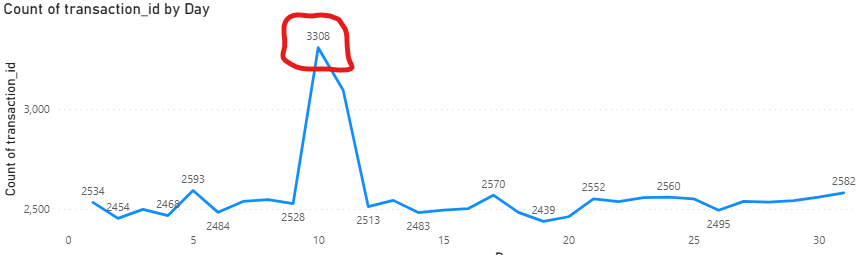

In [78]:
print("=== STEP 4: TEMPORAL FRAUD HUNTING ===")

daily_fraud = (df
    .groupby(df["creation_date"])["auth_result"]
    .apply(lambda x: (x == "FRAUD").mean())
    .sort_values(ascending=False)
)

print("\nDaily Fraud Rate (Top 5 Fraud-Dense Days):")
print(daily_fraud.head(5))


=== STEP 4: TEMPORAL FRAUD HUNTING ===

Daily Fraud Rate (Top 5 Fraud-Dense Days):
creation_date
2022-01-10    0.015417
2022-01-08    0.013736
2022-01-11    0.013247
2022-01-31    0.012393
2022-01-28    0.011834
Name: auth_result, dtype: float64


In [69]:
daily_summary = df.groupby(df["creation_date"]).agg(
    tx=("transaction_id","count"),
    fraud_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
).sort_values(["fraud_rate","tx"], ascending=False)

daily_summary.head(10)


,tx,fraud_rate,refused_rate
creation_date,,,
2022-01-10,3308,0.015417,0.215840
2022-01-08,2548,0.013736,0.032182
2022-01-11,3095,0.013247,0.208078
2022-01-31,2582,0.012393,0.026336
2022-01-28,2535,0.011834,0.031164
2022-01-05,2593,0.011570,0.027381
2022-01-07,2539,0.011422,0.030721
2022-01-15,2495,0.011222,0.028457
2022-01-26,2495,0.011222,0.033267


<div class="alert alert-warning">
    <strong>Note (Temporal Pattern Mapping):</strong>
    <br/>
    Because timestamps are day-level (not hourly), we perform temporal hunting at <strong>daily granularity</strong>. 
    We track three daily indicators:
    <ul>
        <li><strong>Volume:</strong> transaction count per day</li>
        <li><strong>Fraud proxy rate:</strong> % of auth_result == FRAUD</li>
        <li><strong>Refused rate:</strong> % of auth_result == REFUSED (attack/noise proxy)</li>
    </ul>
</div>


<div class="alert alert-danger">
    <strong>High Risk Pattern: Attack-Wave Day Identified (2022-01-10)</strong>
    <ul>
        <li><strong>Daily volume:</strong> 3308 transactions (highest day)</li>
        <li><strong>Fraud proxy rate:</strong> 1.5417% (highest day)</li>
        <li><strong>REFUSED rate:</strong> 21.5840% (extremely elevated vs other days)</li>
    </ul>
    <em>Finding:</em> The combination of <strong>peak volume</strong> + <strong>peak fraud proxy</strong> + <strong>very high refused rate</strong> is consistent with a 
    <strong>burst attack/testing wave</strong> rather than normal demand fluctuations.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Operational + Preventive):</strong>
    <ul>
        <li><strong>Operational alerting:</strong> Trigger an alert when daily REFUSED rate spikes (attack/noise proxy) alongside volume.</li>
        <li><strong>Preventive controls:</strong> On spike days, apply stricter velocity/identity-reuse thresholds (per IP/email/card) and route ambiguous cases to <strong>Challenge</strong>.</li>
        <li><strong>Targeted enforcement:</strong> If the spike is driven by a small set of IPs/entities (as shown in earlier cluster analysis), apply <strong>rate limiting / TTL blocklisting</strong> to remove attack traffic with minimal conversion impact.</li>
    </ul>
</div>


In [83]:
daily_summary["refused_rate"].describe()


count    31.000000
mean      0.041007
std       0.045752
min       0.022773
25%       0.027520
50%       0.029651
75%       0.031289
max       0.215840
Name: refused_rate, dtype: float64

In [86]:
daily_tx = df.groupby("creation_date")["transaction_id"].count().sort_values(ascending=False)
spike_day = daily_tx.index[0]

spike_df = df[df["creation_date"] == spike_day].copy()

top_ips_spike = (spike_df.groupby("ip_id")
                 .size()
                 .sort_values(ascending=False)
                 .head(10)
                 .to_frame("tx_on_spike_day"))
top_ips_spike


,tx_on_spike_day
ip_id,
7065ee7d9882c44278879f4b4b154d03,309
933c900af847f49475eb6a9bcf70d735,257
06a9ec59540dbae94271add0496cde52,211
7e4f0027cda022e8d2e0ddbfbbdd5206,4
0003cbba9aec4556ed9360b053043ecf,1
ac90e64f141e40e8e29314f3e1ca393e,1
acbbc484ff885d83e13d27d0c8237f7f,1
ad0a57315b2c9f537ad3622bdc9e6872,1
ad44746a9a045f4e619b310bb811f0e0,1


In [87]:
# How much of the spike is explained by the 3 hot IPs you already found?
spike_share_hot_ips = (spike_df["ip_id"].isin(hot_ips)).mean()
spike_share_hot_ips


0.2348851269649335

In [88]:
# Outcome mix on spike day vs normal days
mix_spike = spike_df["auth_result"].value_counts(normalize=True)
mix_nonspike = df[df["creation_date"] != spike_day]["auth_result"].value_counts(normalize=True)

pd.DataFrame({"spike_day": mix_spike, "non_spike_days": mix_nonspike}).fillna(0)


,spike_day,non_spike_days
AUTHORISED,0.681681,0.834319
ERROR,0.039601,0.048394
FRAUD,0.015417,0.010217
INSUFFICIENT_FUNDS_OR_LIMIT_EXCEEDED,0.047461,0.070598
REFUSED,0.21584,0.036473


<div class="alert alert-warning">
    <strong>Note (Spike-Day Driver Analysis):</strong>
    <br/>
    After detecting the peak-volume / peak-fraud day (<strong>2022-01-10</strong>), we decomposed the spike into:
    <ul>
        <li><strong>Entity concentration:</strong> top IPs by transaction count</li>
        <li><strong>Hot-IP attribution:</strong> what share of the spike day is explained by previously identified hot IPs</li>
        <li><strong>Outcome mix shift:</strong> AUTH/REFUSED/ERROR/FRAUD distribution on spike day vs other days</li>
    </ul>
</div>


<div class="alert alert-danger">
    <strong>High Risk Pattern: Spike Day (2022-01-10) Is Partially Driven by Hot IP Infrastructure</strong>
    <ul>
        <li><strong>Top IP volumes on spike day:</strong> 309 / 257 / 211 transactions (top 3 IPs)</li>
        <li><strong>Share of spike-day traffic from the 3 hot IPs:</strong> <strong>~23.49%</strong></li>
        <li><strong>Authorization drop:</strong> AUTHORISED <strong>~68.17%</strong> (spike day) vs <strong>~83.43%</strong> (non-spike days)</li>
    </ul>
    <em>Finding:</em> A small set of IPs accounts for nearly a <strong>quarter</strong> of spike-day traffic and coincides with a sharp drop in authorization rate,
    consistent with an <strong>attack wave / scripted testing</strong> rather than organic demand.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Temporal + Infrastructure Controls):</strong>
    <ul>
        <li><strong>Hot-IP enforcement:</strong> Apply <strong>rate limiting / TTL blocklisting</strong> for IPs exhibiting daily burst + identity churn (cards/emails).</li>
        <li><strong>Attack-wave detection:</strong> Alert when daily <strong>REFUSED rate</strong> spikes alongside volume and an increase in traffic concentration from top IPs.</li>
        <li><strong>Conversion protection:</strong> Use <strong>Challenge</strong> rather than blanket rejects outside confirmed hot IPs, to avoid impacting legitimate international traffic.</li>
    </ul>
</div>


In [92]:
df["is_core_cluster"] = (
    (df["length_of_stay"] == 0) &
    (df["booker_country"] == "Spain") &
    (df["card_issuing_country"] == "Iceland") &
    (df["hotel_country"] == "Norway") &
    (df["payment_method"] == "american express")
).astype(int)
df.head()

,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method,length_of_stay_adj,price_per_night,is_zero_stay,mismatch_booker_vs_issuing,mismatch_booker_vs_hotel,mismatch_issuing_vs_hotel,geo_mismatch_score,is_core_cluster
0,922278674,2022-01-07,e1fcad6672daa92bd6b5020fd954ff5a,0bb5ba2d7dd11cd0cf12f6db8fba25b0,Germany,Germany,Germany,90084,German,3478.16,89,5,9dfb54bfcfeebaffb4774a374d1a52dc,@strawberry.com,AUTHORISED,30,mastercard,5,695.632000,0,0,0,0,0,0
1,819686771,2022-01-22,5a71be20c6d46f2393be71d7199b607e,bb01aa67b20f28b8ce29e3a60d8ab276,Iceland,Iceland,Bulgaria,56417,Icelandic,2476.98,30,13,cc6996a700b82b759c87d0b2ddf64611,@grapefruit.com,AUTHORISED,28,visa,13,190.536923,0,0,1,1,2,0
2,755157875,2022-01-09,c25608c42c31aeafa1d7ad8012906b3c,09f5288f5bdd02b54c38825d1c29f5c9,Norway,Norway,Norway,22278,Slovak,2855.06,68,17,eda9797a55551a5b8006bbee110b44a7,@grape.com,AUTHORISED,29,mastercard,17,167.944706,0,0,0,0,0,0
3,601281336,2022-01-17,e782033ba3a8dd86edd4f798579a0f92,288c1c58f5255956d78e2e526f9a2910,Spain,Spain,Italy,44946,Spanish,3780.31,11,17,731b84fa086015230b89780553603ea8,@blueberry.com,AUTHORISED,33,visa,17,222.371176,0,0,1,1,2,0
4,152684295,2022-01-25,3895fc0fecfd3d4f31d7d708fc592098,95d0d8ec61b03bf7fd4250086313ab22,Germany,Germany,Norway,91658,German,2115.12,64,13,406e2e3950a284067b393d7137212f64,@lemon.com,AUTHORISED,27,paypal,13,162.701538,0,0,1,1,2,0


# 5) Payment Method Risk (global + interaction with my cluster)

In [90]:
pm_rates = df.groupby("payment_method").agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean()),
).sort_values("n", ascending=False)

pm_rates

,n,fraud_proxy_rate,refused_rate,authorised_rate
payment_method,,,,
visa,31061,0.009272,0.029877,0.839960
mastercard,27026,0.011100,0.028047,0.838341
american express,13097,0.011987,0.118882,0.768497
paypal,6905,0.008979,0.027951,0.846198
klarna,1468,0.015668,0.040191,0.828338


In [91]:
# Interaction: payment method risk inside 0-night vs non-zero
pm_seg = df.groupby(["is_zero_stay","payment_method"]).agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean()),
).reset_index().sort_values(["is_zero_stay","n"], ascending=[True,False])

pm_seg.head(20)


,is_zero_stay,payment_method,n,fraud_proxy_rate,refused_rate,authorised_rate
4,0,visa,31027,0.009250,0.029845,0.839946
2,0,mastercard,26984,0.011081,0.028017,0.838312
0,0,american express,12888,0.011716,0.108706,0.777545
3,0,paypal,6854,0.008754,0.028013,0.846513
1,0,klarna,1466,0.015689,0.040246,0.828104
5,1,american express,209,0.028708,0.746411,0.210526
8,1,paypal,51,0.039216,0.019608,0.803922
7,1,mastercard,42,0.023810,0.047619,0.857143
9,1,visa,34,0.029412,0.058824,0.852941
6,1,klarna,2,0.000000,0.000000,1.000000


<div class="alert alert-warning">
    <strong>Note (Payment Method Interpretation):</strong>
    <br/>
    Key story:

- AmEx stands out mainly because of refusals (11.9% vs ~2.8–3.0% for Visa/MC/PayPal). That’s consistent with the earlier “attack/noise” corridor: lots of attempted payments failing.

- AmEx becomes very high risk when combined with 0-night (and your corridor/hot IP evidence).

- Klarna has the highest fraud proxy rate (1.57%) but smaller volume; not enough to block, but worth “risk multiplier”.
</div>


<div class="alert alert-success">
    <strong>Mitigation Option A (Recommended): Risk Multiplier</strong>
    <ul>
        <li>Never block on <strong>payment_method</strong> alone.</li>
        <li>Use it as a <strong>risk multiplier</strong>:
            <ul>
                <li><strong>AmEx</strong> + (0-night OR mismatch=3 OR velocity signals) → <strong>Challenge</strong> / <strong>Throttle</strong></li>
                <li><strong>Klarna</strong> + high severity (price/urgency) → <strong>Challenge</strong></li>
            </ul>
        </li>
    </ul>
</div>


In [102]:
df["seg_auto_challenge_1"] = ((df["is_zero_stay"]==1) & (df["payment_method"]=="american express")).astype(int)

df["seg_auto_challenge_2"] = (
    (df["geo_mismatch_score"]==3) & (df["payment_method"].isin(["american express","klarna"]))
).astype(int)

df[["seg_auto_challenge_1","seg_auto_challenge_2"]].mean()


seg_auto_challenge_1    0.002627
seg_auto_challenge_2    0.023530
dtype: float64

In [103]:
df.head()

,transaction_id,creation_date,ip_id,credit_card_id,booker_country,card_issuing_country,hotel_country,hotel_id,language,price_euro,book_window,length_of_stay,email_id,email_domain,auth_result,property_age,payment_method,length_of_stay_adj,price_per_night,is_zero_stay,mismatch_booker_vs_issuing,mismatch_booker_vs_hotel,mismatch_issuing_vs_hotel,geo_mismatch_score,is_core_cluster,price_bucket,book_window_bucket,property_age_bucket,seg_auto_challenge_1,seg_auto_challenge_2
0,922278674,2022-01-07,e1fcad6672daa92bd6b5020fd954ff5a,0bb5ba2d7dd11cd0cf12f6db8fba25b0,Germany,Germany,Germany,90084,German,3478.16,89,5,9dfb54bfcfeebaffb4774a374d1a52dc,@strawberry.com,AUTHORISED,30,mastercard,5,695.632000,0,0,0,0,0,0,"(3453.854, 3880.524]","(30.0, 1000.0]","(24, 60]",0,0
1,819686771,2022-01-22,5a71be20c6d46f2393be71d7199b607e,bb01aa67b20f28b8ce29e3a60d8ab276,Iceland,Iceland,Bulgaria,56417,Icelandic,2476.98,30,13,cc6996a700b82b759c87d0b2ddf64611,@grapefruit.com,AUTHORISED,28,visa,13,190.536923,0,0,1,1,2,0,"(2356.846, 2613.8]","(14.0, 30.0]","(24, 60]",0,0
2,755157875,2022-01-09,c25608c42c31aeafa1d7ad8012906b3c,09f5288f5bdd02b54c38825d1c29f5c9,Norway,Norway,Norway,22278,Slovak,2855.06,68,17,eda9797a55551a5b8006bbee110b44a7,@grape.com,AUTHORISED,29,mastercard,17,167.944706,0,0,0,0,0,0,"(2613.8, 2869.64]","(30.0, 1000.0]","(24, 60]",0,0
3,601281336,2022-01-17,e782033ba3a8dd86edd4f798579a0f92,288c1c58f5255956d78e2e526f9a2910,Spain,Spain,Italy,44946,Spanish,3780.31,11,17,731b84fa086015230b89780553603ea8,@blueberry.com,AUTHORISED,33,visa,17,222.371176,0,0,1,1,2,0,"(3453.854, 3880.524]","(7.0, 14.0]","(24, 60]",0,0
4,152684295,2022-01-25,3895fc0fecfd3d4f31d7d708fc592098,95d0d8ec61b03bf7fd4250086313ab22,Germany,Germany,Norway,91658,German,2115.12,64,13,406e2e3950a284067b393d7137212f64,@lemon.com,AUTHORISED,27,paypal,13,162.701538,0,0,1,1,2,0,"(2089.18, 2356.846]","(30.0, 1000.0]","(24, 60]",0,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79557 entries, 0 to 79556
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transaction_id              79557 non-null  string        
 1   creation_date               79557 non-null  datetime64[ns]
 2   ip_id                       79557 non-null  string        
 3   credit_card_id              79557 non-null  string        
 4   booker_country              79557 non-null  string        
 5   card_issuing_country        79557 non-null  string        
 6   hotel_country               79557 non-null  string        
 7   hotel_id                    79557 non-null  string        
 8   language                    79557 non-null  string        
 9   price_euro                  79557 non-null  float64       
 10  book_window                 79557 non-null  int64         
 11  length_of_stay              79557 non-null  int64     

<div class="alert alert-success">
    <strong>Mitigation Option B: Segmented Challenge Policy</strong>
    <ul>
        <li><strong>Segment 1 (Auto-Challenge):</strong> <strong>is_zero_stay=1</strong> AND <strong>payment_method=american express</strong></li>
        <li><strong>Segment 2 (Auto-Challenge):</strong> <strong>geo_mismatch_score=3</strong> AND <strong>payment_method IN {american express, klarna}</strong></li>
        <li><strong>Escalation to Reject:</strong> Only if the above segments also show <strong>attack infrastructure signals</strong> (hot IP, high identity churn: many cards/emails per IP/day).</li>
    </ul>
    <em>Rationale:</em> This targets the highest-risk intersections while preserving conversion for legitimate international travelers.
</div>


In [93]:
#Price Exposure & Severity (quantiles + fraud concentration)
df["price_bucket"] = pd.qcut(df["price_euro"], q=10, duplicates="drop")

price_risk = df.groupby("price_bucket").agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    avg_price=("price_euro","mean"),
    total_exposure=("price_euro","sum")
).sort_values("fraud_proxy_rate", ascending=False)

price_risk.head(10)


,n,fraud_proxy_rate,refused_rate,avg_price,total_exposure
price_bucket,,,,,
"(2869.64, 3141.624]",7955,0.011188,0.046260,3004.648568,23901979.36
"(2356.846, 2613.8]",7956,0.011187,0.043615,2485.300803,19773053.19
"(2613.8, 2869.64]",7956,0.011187,0.049020,2742.104252,21816181.43
"(3880.524, 4999.2]",7956,0.010935,0.052539,4275.526533,34016089.10
"(3141.624, 3453.854]",7955,0.010811,0.045506,3290.282314,26174195.81
"(1780.076, 2089.18]",7955,0.010685,0.039346,1938.438629,15420279.29
"(1351.448, 1780.076]",7956,0.010558,0.038839,1579.122622,12563499.58
"(3453.854, 3880.524]",7956,0.010558,0.047888,3648.761962,29029550.17
"(200.119, 1351.448]",7956,0.009301,0.032680,952.118629,7575055.81


<div class="alert alert-success">
    <strong>Mitigation (Severity-Weighted Controls):</strong>
    <ul>
        <li><strong>Do not</strong> treat high price as fraud by itself (fraud rate is relatively flat across price deciles).</li>
        <li>Use <strong>price_euro</strong> (and later <strong>price_per_night</strong>) as a <strong>severity multiplier</strong>:
            <ul>
                <li><strong>High-price bookings</strong> → prefer <strong>Challenge</strong> (step-up) when any other risk signal is present (mismatch=3, 0-night, identity churn).</li>
                <li>Escalate to <strong>Reject</strong> only when combined with <strong>high-confidence attack signals</strong> (hot IP / extreme diversity).</li>
            </ul>
        </li>
        <li>Prioritize monitoring and controls on buckets with the highest <strong>fraud_amount</strong> to maximize ROI.</li>
    </ul>
</div>


In [94]:
# Severity-weighted: where is the money at risk?
df.assign(fraud_amount=df["price_euro"]*(df["auth_result"]=="FRAUD")).groupby("price_bucket").agg(
    fraud_tx=("auth_result", lambda s: (s=="FRAUD").sum()),
    fraud_amount=("fraud_amount","sum"),
    total_amount=("price_euro","sum")
).assign(fraud_amount_share=lambda x: x["fraud_amount"]/x["total_amount"]).sort_values("fraud_amount", ascending=False).head(10)


,fraud_tx,fraud_amount,total_amount,fraud_amount_share
price_bucket,,,,
"(3880.524, 4999.2]",87,371642.88,34016089.10,0.010926
"(3453.854, 3880.524]",84,307066.05,29029550.17,0.010578
"(3141.624, 3453.854]",86,281762.09,26174195.81,0.010765
"(2869.64, 3141.624]",89,266667.56,23901979.36,0.011157
"(2613.8, 2869.64]",89,243996.4,21816181.43,0.011184
"(2356.846, 2613.8]",89,221795.67,19773053.19,0.011217
"(1780.076, 2089.18]",85,163609.99,15420279.29,0.01061
"(2089.18, 2356.846]",63,140955.89,17707969.22,0.00796
"(1351.448, 1780.076]",84,132541.92,12563499.58,0.01055


<div class="alert alert-warning">
    <strong>Note (Why this is “high impact”):</strong>
    <br/>
    Even when fraud probability is similar across price buckets, loss is not. 
    Protecting the highest exposure buckets yields the best <strong>€ ROI</strong> with minimal extra friction if applied only when other signals are present.
</div>


In [105]:
ppn_rates = df.groupby(pd.qcut(df["price_per_night"], q=10, duplicates="drop")).agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean()),
    avg_ppn=("price_per_night","mean")
).sort_values("fraud_proxy_rate", ascending=False)

ppn_rates.head(10)


,n,fraud_proxy_rate,refused_rate,authorised_rate,avg_ppn
price_per_night,,,,,
"(397.507, 4996.82]",7956,0.013449,0.160508,0.724987,1007.981440
"(115.299, 138.415]",7955,0.011439,0.030295,0.832055,127.033462
"(138.415, 159.888]",7956,0.011061,0.029160,0.845400,149.076073
"(159.888, 182.553]",7956,0.010558,0.031800,0.833585,171.109615
"(208.076, 240.66]",7956,0.010307,0.029160,0.845274,223.567606
"(182.553, 208.076]",7955,0.009805,0.029541,0.835324,194.914253
"(240.66, 289.947]",7955,0.009805,0.032935,0.842489,263.167087
"(86.088, 115.299]",7956,0.009804,0.026018,0.843766,101.578119
"(8.55, 86.088]",7956,0.009553,0.032177,0.840623,60.646425


<div class="alert alert-danger">
    <strong>High Risk Pattern: Extreme Price-per-Night Bucket</strong>
    <br/>
    The highest <strong>price_per_night</strong> decile shows a materially different risk profile:
    <ul>
        <li><strong>Fraud proxy rate:</strong> ~1.34%</li>
        <li><strong>REFUSED rate:</strong> ~16.05% (very elevated)</li>
        <li><strong>AUTHORISED rate:</strong> ~72.50% (lower than baseline)</li>
        <li><strong>Avg €/night:</strong> ~€1008</li>
    </ul>
    <em>Finding:</em> Extremely high €/night bookings behave abnormally (high decline + higher fraud proxy), making <strong>price_per_night</strong> a stronger severity/anomaly signal than total price.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Severity + Conversion-Safe):</strong>
    <ul>
        <li><strong>Do not</strong> block on high price_per_night alone (luxury bookings exist).</li>
        <li>Use high <strong>price_per_night</strong> as a <strong>risk multiplier</strong>:
            <ul>
                <li>If high €/night overlaps with <strong>geo_mismatch_score=3</strong> or <strong>is_zero_stay=1</strong> → <strong>Challenge</strong></li>
                <li>If also overlaps with <strong>hot IP / identity churn</strong> → <strong>Reject</strong></li>
            </ul>
        </li>
        <li>Operationally: monitor this bucket because it’s high-severity and abnormal-decline heavy.</li>
    </ul>
</div>


<div class="alert alert-warning">
    <strong>Note (Why this matters for ROI):</strong>
    <br/>
    Even if fraud probability increases only modestly, high €/night bookings carry higher <strong>loss severity</strong>. 
    Step-up verification on this segment can deliver better ROI than broad rules applied to low-severity traffic.
</div>
"

In [106]:
seg_rates = df.groupby(["seg_auto_challenge_1","seg_auto_challenge_2"]).agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean()),
).reset_index().sort_values("n", ascending=False)

seg_rates

,seg_auto_challenge_1,seg_auto_challenge_2,n,fraud_proxy_rate,refused_rate,authorised_rate
0,0,0,77662,0.010121,0.029487,0.840321
1,0,1,1686,0.022539,0.622183,0.335706
3,1,1,186,0.032258,0.806452,0.161290
2,1,0,23,0.000000,0.260870,0.608696


<div class="alert alert-danger">
    <strong>High Risk Pattern: Segmentation Successfully Isolates Extreme-Risk Traffic</strong>
    <ul>
        <li><strong>Baseline (seg1=0, seg2=0):</strong> n=77,862 | FRAUD ~1.01% | REFUSED ~2.95% | AUTH ~84.03%</li>
        <li><strong>Segment 2 only (0,1):</strong> n=1,686 | FRAUD ~2.25% | REFUSED ~62.22% | AUTH ~33.57%</li>
        <li><strong>Intersection (1,1):</strong> n=186 | FRAUD ~3.23% | REFUSED ~80.85% | AUTH ~16.13%</li>
    </ul>
    <em>Finding:</em> The proposed segments capture a small share of traffic but contain disproportionately high fraud proxy and extreme decline behavior—consistent with targeted abuse/testing.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Segmented Challenge Policy Validated):</strong>
    <ul>
        <li><strong>Auto-Challenge:</strong> seg_auto_challenge_2 = 1 (mismatch=3 + {AmEx,Klarna})</li>
        <li><strong>Priority Escalation:</strong> seg_auto_challenge_1 = 1 AND seg_auto_challenge_2 = 1 (intersection) → <strong>strongest step-up</strong> / tighter retry limits</li>
        <li><strong>Reject only when confirmed:</strong> If segment traffic also shows <strong>hot IP / identity churn</strong> (e.g., many cards/emails per IP/day) → Reject/TTL blocklist</li>
    </ul>
</div>


<div class="alert alert-warning">
    <strong>Note (Small Sample Caveat):</strong>
    <br/>
    The group (seg1=1, seg2=0) has <strong>n=23</strong>. Metrics here are unstable; do not overfit rules based on this subgroup alone.
</div>


In [95]:
#Urgency Risk (book_window) + interaction with mismatch
df["book_window_bucket"] = pd.cut(df["book_window"], bins=[-0.1,0,1,3,7,14,30,1000], right=True)

bw_risk = df.groupby("book_window_bucket").agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    authorised_rate=("auth_result", lambda s: (s=="AUTHORISED").mean())
).sort_values("fraud_proxy_rate", ascending=False)

bw_risk


,n,fraud_proxy_rate,refused_rate,authorised_rate
book_window_bucket,,,,
"(1.0, 3.0]",965,0.025907,0.501554,0.422798
"(0.0, 1.0]",446,0.024664,0.533632,0.385650
"(3.0, 7.0]",1162,0.021515,0.229776,0.660929
"(-0.1, 0.0]",443,0.013544,0.544018,0.401806
"(30.0, 1000.0]",64248,0.010164,0.029480,0.840555
"(14.0, 30.0]",10311,0.009407,0.030550,0.839686
"(7.0, 14.0]",1982,0.006559,0.028254,0.849142


<div class="alert alert-danger">
    <strong>High Risk Pattern: Last-Minute Booking Windows Have Elevated Fraud Proxy + Extreme Declines</strong>
    <ul>
        <li><strong>(0, 1] days:</strong> FRAUD ~2.47%, REFUSED ~53.36%, AUTH ~38.59%</li>
        <li><strong>(1, 3] days:</strong> FRAUD ~2.59%, REFUSED ~50.16%, AUTH ~42.28%</li>
        <li><strong>(3, 7] days:</strong> FRAUD ~2.15%, REFUSED ~22.98%, AUTH ~66.09%</li>
        <li><strong>(30, 1000] days:</strong> FRAUD ~1.02%, REFUSED ~2.95%, AUTH ~84.06% (baseline-like)</li>
    </ul>
    <em>Finding:</em> Short booking windows show both higher fraud proxy and extremely high refusal rates, consistent with attack/testing traffic and noisy attempts.
</div>


In [96]:
# interaction: mismatch score 3 + last-minute is a strong trigger
bw_mismatch = df.groupby(["geo_mismatch_score","book_window_bucket"]).agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean())
).reset_index().sort_values(["geo_mismatch_score","fraud_proxy_rate"], ascending=[True,False])

bw_mismatch.head(20)


,geo_mismatch_score,book_window_bucket,n,fraud_proxy_rate,refused_rate
2,0,"(1.0, 3.0]",126,0.023810,0.015873
3,0,"(3.0, 7.0]",315,0.015873,0.022222
5,0,"(14.0, 30.0]",5994,0.010677,0.032032
6,0,"(30.0, 1000.0]",37402,0.010240,0.029785
4,0,"(7.0, 14.0]",1075,0.005581,0.023256
0,0,"(-0.1, 0.0]",49,0.000000,0.061224
1,0,"(0.0, 1.0]",51,0.000000,0.039216
8,2,"(0.0, 1.0]",35,0.028571,0.142857
10,2,"(3.0, 7.0]",232,0.017241,0.021552
13,2,"(30.0, 1000.0]",24929,0.010069,0.028882


<div class="alert alert-danger">
    <strong>Amplifier: Geo Full Mismatch (Score=3) + Last-Minute Is Extremely Risky</strong>
    <ul>
        <li><strong>Mismatch=3 & (0,1] days:</strong> FRAUD ~2.78%, REFUSED ~64.17%</li>
        <li><strong>Mismatch=3 & (1,3] days:</strong> FRAUD ~2.85%, REFUSED ~64.59%</li>
        <li><strong>Mismatch=3 & (3,7] days:</strong> FRAUD ~2.60%, REFUSED ~41.46%</li>
        <li><strong>Mismatch=3 & (30,1000] days:</strong> FRAUD ~0.99%, REFUSED ~3.13% (much safer)</li>
    </ul>
    <em>Finding:</em> The risk is not “last-minute” alone; it is the <strong>intersection</strong> of last-minute urgency with full geo mismatch.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Segmented Challenge Policy, Conversion-Safe):</strong>
    <ul>
        <li><strong>Do not</strong> apply friction to all last-minute bookings (legitimate urgent travel exists).</li>
        <li><strong>Auto-Challenge triggers:</strong>
            <ul>
                <li><strong>geo_mismatch_score = 3</strong> AND <strong>book_window ≤ 3 days</strong> → <strong>Challenge</strong></li>
                <li><strong>is_zero_stay = 1</strong> AND <strong>book_window ≤ 3 days</strong> → <strong>Challenge</strong></li>
            </ul>
        </li>
        <li><strong>Escalate to Reject</strong> only when combined with <strong>attack infrastructure signals</strong> (hot IP, high identity churn).</li>
    </ul>
</div>


<div class="alert alert-warning">
    <strong>Note (Why REFUSED matters here):</strong>
    <br/>
    Extremely high <strong>REFUSED</strong> rates in short windows suggest a substantial amount of traffic is <strong>non-converting noise</strong> (testing/probing).
    Controls should prioritize <strong>rate-limiting/throttling</strong> and <strong>step-up verification</strong> rather than blanket blocking.
</div>


In [97]:
#Property Risk (property_age + hotel_id outliers)
df["property_age_bucket"] = pd.cut(df["property_age"], bins=[-1,1,3,6,12,24,60,10_000])

prop_risk = df.groupby("property_age_bucket").agg(
    n=("transaction_id","count"),
    fraud_proxy_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean())
).sort_values("fraud_proxy_rate", ascending=False)

prop_risk


,n,fraud_proxy_rate,refused_rate
property_age_bucket,,,
"(-1, 1]",1479,0.027721,0.812035
"(12, 24]",8104,0.011229,0.031343
"(24, 60]",69974,0.009975,0.029154
"(1, 3]",0,<NA>,<NA>
"(3, 6]",0,<NA>,<NA>
"(6, 12]",0,<NA>,<NA>
"(60, 10000]",0,<NA>,<NA>


<div class="alert alert-danger">
    <strong>High Risk Pattern: Very New Properties (property_age ≤ 1 month) Attract Extreme Decline + Higher Fraud Proxy</strong>
    <ul>
        <li><strong>property_age (-1, 1] months:</strong> n=1,479</li>
        <li><strong>FRAUD proxy rate:</strong> ~2.77% (≈2.7x baseline)</li>
        <li><strong>REFUSED rate:</strong> ~81.20% (extremely elevated)</li>
    </ul>
    <em>Finding:</em> Newly registered properties behave as high-risk surfaces and may be targeted by fraud/testing traffic or have weaker trust signals early in lifecycle.
</div>


<div class="alert alert-warning">
    <strong>Note (Data Coverage Caveat):</strong>
    <br/>
    In this dataset, <strong>property_age</strong> is not evenly distributed across all buckets (several mid-range buckets have zero observations). 
    Conclusions should be applied as <strong>risk multipliers</strong> rather than hard rules.
</div>


In [98]:
# property outliers: hotels with unusual fraud/refused mix (min volume)
MIN_TX = 50
hotel_risk = df.groupby("hotel_id").agg(
    n=("transaction_id","count"),
    fraud_rate=("auth_result", lambda s: (s=="FRAUD").mean()),
    refused_rate=("auth_result", lambda s: (s=="REFUSED").mean()),
    avg_price=("price_euro","mean")
).query("n >= @MIN_TX").sort_values(["fraud_rate","n"], ascending=False).head(20)

hotel_risk


,n,fraud_rate,refused_rate,avg_price
hotel_id,,,,
70304,295,0.037288,0.800000,2875.243729
42442,178,0.033708,0.803371,2869.731966
43013,187,0.032086,0.780749,3047.719947
79119,127,0.031496,0.779528,2995.848661
11701,244,0.028689,0.819672,3040.715123
98294,176,0.017045,0.835227,2993.390341
58631,272,0.014706,0.845588,3002.903419
16909,137,0.000000,0.000000,1251.468321


<div class="alert alert-danger">
    <strong>High Risk Pattern: Hotel-Level Outliers (Min Volume Applied)</strong>
    <br/>
    Using a minimum support threshold (<strong>n ≥ 50</strong>), we found hotel_ids with unusually high fraud proxy and extreme decline behavior:
    <ul>
        <li>Top hotel_ids show <strong>fraud_rate ~2.9%–3.7%</strong> and <strong>refused_rate ~78%–83%</strong></li>
        <li>These hotels also have high average booking values (avg_price ~€2.8k–€3.0k)</li>
    </ul>
    <em>Finding:</em> These properties are likely being targeted (or are highly exposed inventory), and warrant targeted mitigation rather than global rules.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Platform Risk Controls):</strong>
    <ul>
        <li><strong>New property guardrail:</strong> For <strong>property_age ≤ 1 month</strong>, apply stricter thresholds only on high-severity / high-risk intersections (e.g., mismatch=3, last-minute, 0-night, high €/night).</li>
        <li><strong>Hotel outlier workflow:</strong> Route hotel_id outliers to <strong>manual investigation</strong> (property integrity / collusion checks) and apply temporary friction controls to suspicious traffic.</li>
        <li><strong>Avoid blanket blocking:</strong> Use <strong>reason codes</strong> and reversible actions (Challenge/Throttle) to minimize false positives.</li>
    </ul>
</div>


In [107]:
#“new property” transactions overlap with your previously found hot patterns (0-night, mismatch=3, AmEx).
new_prop = df[df["property_age"] <= 1].copy()

new_prop_overlap = pd.Series({
    "n_new_prop": len(new_prop),
    "share_zero_stay": new_prop["is_zero_stay"].mean(),
    "share_mismatch3": (new_prop["geo_mismatch_score"]==3).mean(),
    "share_amex": (new_prop["payment_method"]=="american express").mean(),
    "share_core_cluster": new_prop["is_core_cluster"].mean(),
}).to_frame("value")

new_prop_overlap

,value
n_new_prop,1479.000000
share_zero_stay,0.128465
share_mismatch3,0.987153
share_amex,1.000000
share_core_cluster,0.116295


<div class="alert alert-danger">
    <strong>High Risk Pattern: "New Property" Risk Is Almost Entirely Explained by Existing High-Risk Signals</strong>
    <ul>
        <li><strong>New property cohort size (property_age ≤ 1 month):</strong> n=1,479</li>
        <li><strong>AmEx share:</strong> 100%</li>
        <li><strong>Geo mismatch score = 3 share:</strong> 98.7%</li>
        <li><strong>0-night share:</strong> 12.85%</li>
        <li><strong>Core cluster share:</strong> 11.63%</li>
    </ul>
    <em>Finding:</em> In this dataset, “new property” traffic is strongly coupled to the same high-risk corridor/payment patterns (AmEx + full geo mismatch), indicating a targeted attack surface rather than broad onboarding weakness.
</div>


<div class="alert alert-success">
    <strong>Mitigation (Avoid Broad Collateral on New Properties):</strong>
    <ul>
        <li><strong>Do not</strong> apply blanket friction to all new properties.</li>
        <li>Apply targeted controls only when <strong>property_age ≤ 1 month</strong> overlaps with:
            <ul>
                <li><strong>geo_mismatch_score = 3</strong> and/or <strong>seg_auto_challenge_2 = 1</strong> → <strong>Challenge</strong></li>
                <li><strong>is_core_cluster = 1</strong> or hot-IP/identity churn → <strong>Reject / TTL blocklist</strong></li>
            </ul>
        </li>
        <li>Operational action: flag affected properties for <strong>property integrity review</strong> (targeted attack monitoring).</li>
    </ul>
</div>


<div class="alert alert-warning">
    <strong>Note (Interpretation Boundaries):</strong>
    <br/>
    The strong coupling (100% AmEx, ~99% mismatch=3) suggests this “new property” finding is driven by a specific corridor/attack pattern in the provided dataset, 
    and should be operationalized as an <strong>intersection rule</strong> rather than a universal statement about all new properties.
</div>


# Final of the EDA

<div class="alert alert-info">
    <strong>EDA Wrap-Up (Submit-Ready): Key Findings & Recommended Actions</strong>
    <br/>
    This section summarizes the highest-impact fraud signals discovered in the dataset and proposes mitigation actions that balance fraud loss reduction with conversion protection.
</div>


<div class="alert alert-success">
    <strong>Data Integrity & Scope Checks</strong>
    <ul>
        <li><strong>Dataset size:</strong> 79,557 transactions</li>
        <li><strong>Nulls:</strong> No missing values observed across core fields (post-parsing)</li>
        <li><strong>Date coverage:</strong> 2022-01-01 to 2022-01-31 (day-level granularity)</li>
        <li><strong>Primary key:</strong> <strong>transaction_id has no duplicates</strong> (safe dedup anchor)</li>
        <li><strong>Range sanity:</strong> No negative values in price/book_window/property_age; however <strong>length_of_stay == 0 exists (338 rows)</strong> and is treated as an anomaly segment</li>
    </ul>
</div>


<div class="alert alert-danger">
    <strong>Finding 1 — 0-Night Stays Are Abnormally Risky</strong>
    <ul>
        <li><strong>0-night stays:</strong> AUTH ~44.97% vs <strong>non-zero stays:</strong> AUTH ~82.96%</li>
        <li><strong>Interpretation:</strong> 0-night traffic is strongly non-standard and aligns with testing / non-genuine booking intent</li>
    </ul>
    <em>Action:</em> Treat <strong>is_zero_stay</strong> as a major risk flag and only allow low-friction paths when other risk signals are absent.
</div>


<div class="alert alert-danger">
    <strong>Finding 2 — “Core Corridor Cluster” Dominates 0-Night Risk</strong>
    <ul>
        <li><strong>Dominant corridor inside 0-night:</strong> booker=Spain, issuing=Iceland, hotel=Norway, payment=AmEx</li>
        <li><strong>Cluster volume:</strong> 172 transactions (largest 0-night corridor group)</li>
        <li><strong>Outcome mix (core corridor 0-night):</strong> AUTH ~15.70%, REFUSED ~81.40% (extremely low conversion)</li>
    </ul>
    <em>Action:</em> Add an incident signature flag (<strong>is_core_cluster</strong>) for targeted mitigation (throttle/Challenge/Reject depending on infrastructure signals).
</div>


<div class="alert alert-danger">
    <strong>Finding 3 — Hot IP Infrastructure Indicates Card-Testing / Automated Abuse</strong>
    <ul>
        <li><strong>Core cluster is driven by only 3 IPs:</strong> 7065…, 933c…, 06a9…</li>
        <li><strong>Within cluster:</strong> these 3 IPs cover <strong>100%</strong> of core corridor traffic</li>
        <li><strong>Daily pattern:</strong> top IPs show extreme bursts (e.g., 309/292 tx per day) and high identity diversity</li>
    </ul>
    <em>Action:</em> Infrastructure control: <strong>rate-limit + TTL blocklist</strong> hot IPs exhibiting high daily volume + distinct cards/emails (low collateral, high ROI).
</div>




<div class="alert alert-danger">
    <strong>Finding 4 — Temporal Attack Wave Confirmed (Day-Level)</strong>
    <ul>
        <li><strong>Peak day:</strong> 2022-01-10</li>
        <li><strong>Volume:</strong> 3308 transactions (highest day)</li>
        <li><strong>Fraud proxy rate:</strong> ~1.5417% (highest day)</li>
        <li><strong>Refused rate:</strong> ~21.584% (high attack/noise proxy)</li>
        <li><strong>Attribution:</strong> the 3 hot IPs account for <strong>~23.49%</strong> of spike-day traffic</li>
    </ul>
    <em>Action:</em> Add a monitoring rule: alert on daily spikes in <strong>volume + refused_rate + top-IP concentration</strong>; tighten controls during spike windows.
</div>


<div class="alert alert-warning">
    <strong>Finding 5 — Geo Mismatch: Not All Mismatch Is Risky</strong>
    <ul>
        <li><strong>geo_mismatch_score can only be:</strong> 0, 2, or 3 (score=1 is mathematically impossible with 3-way mismatch)</li>
        <li><strong>Score=2:</strong> behaves close to baseline (do not penalize international travel)</li>
        <li><strong>Score=3:</strong> shows elevated fraud proxy and extreme refused rates</li>
    </ul>
    <em>Action:</em> Use <strong>geo_mismatch_score=3</strong> as a key trigger, but avoid acting on mismatch=2 alone to protect conversion.
</div>


<div class="alert alert-danger">
    <strong>Finding 6 — Corridor Ranking (Mismatch=3) Identifies Risk-Dense Routes (Min Support Applied)</strong>
    <ul>
        <li>After filtering to corridors with <strong>n ≥ 30</strong>, several mismatch=3 corridors show materially higher fraud proxy</li>
        <li><strong>Largest/highest-impact:</strong> Spain → Iceland → Norway (n=1366) with FRAUD ~2.78% and REFUSED ~80.97%</li>
        <li><strong>Repeated issuer signal:</strong> card_issuing_country=Malta appears across multiple high-risk corridors (treat as a risk amplifier, not a standalone block)</li>
    </ul>
    <em>Action:</em> Use corridor membership as a <strong>risk multiplier</strong> combined with other signals (0-night, urgency, hot IP/identity churn).
</div>


<div class="alert alert-danger">
    <strong>Finding 7 — Payment Method: AmEx Is a Decline/Noise Driver and Becomes Extreme in 0-Night</strong>
    <ul>
        <li><strong>Global AmEx:</strong> REFUSED ~11.89% (vs ~2.8–3.0% for Visa/MC/PayPal), AUTH ~76.85%</li>
        <li><strong>0-night + AmEx:</strong> REFUSED ~74.64%, AUTH ~21.05%, FRAUD ~2.79%</li>
        <li><strong>Klarna:</strong> highest global fraud proxy (~1.57%) but lower volume</li>
    </ul>
    <em>Action:</em> Do not block by payment method alone; use payment method only inside high-risk intersections (segmentation).
</div>


<div class="alert alert-success">
    <strong>Validated Policy — Segmented Challenge Strategy (High Precision, Conversion-Safe)</strong>
    <ul>
        <li><strong>Segment 2 (seg_auto_challenge_2):</strong> mismatch=3 AND payment_method in {AmEx, Klarna}
            <ul>
                <li>n=1,686 | FRAUD ~2.25% | REFUSED ~62.22% | AUTH ~33.57%</li>
            </ul>
        </li>
        <li><strong>Intersection (seg1=1 & seg2=1):</strong> strongest risk pocket
            <ul>
                <li>n=186 | FRAUD ~3.23% | REFUSED ~80.85% | AUTH ~16.13%</li>
            </ul>
        </li>
    </ul>
    <em>Action:</em> Default to <strong>Challenge</strong> for these segments; escalate to <strong>Reject</strong> only when attack infrastructure signals fire (hot IP / high identity churn).
</div>


<div class="alert alert-danger">
    <strong>Finding 8 — Urgency (book_window) Is Risky Mainly as an Amplifier</strong>
    <ul>
        <li><strong>Very short windows (≤3 days):</strong> FRAUD ~2.47–2.59% with REFUSED ~50–53% and low AUTH (~38–42%)</li>
        <li><strong>Mismatch=3 + ≤3 days:</strong> REFUSED ~64% with FRAUD ~2.78–2.85%</li>
        <li><strong>Mismatch=3 + long window:</strong> returns closer to baseline</li>
    </ul>
    <em>Action:</em> Apply friction only for <strong>mismatch=3 AND book_window ≤ 3</strong> (avoid blanket last-minute blocking).
</div>


<div class="alert alert-danger">
    <strong>Finding 9 — Severity: price_per_night Is a Better Anomaly Signal than Total Price</strong>
    <ul>
        <li>Total price fraud rates were relatively flat across deciles, but <strong>€ impact concentrates in high exposure buckets</strong></li>
        <li><strong>Top price_per_night decile (~€398–€4996/night):</strong> FRAUD ~1.34%, REFUSED ~16.05%, AUTH ~72.50%</li>
    </ul>
    <em>Action:</em> Use <strong>price_per_night</strong> as a severity/anomaly multiplier and apply Challenge when it overlaps with mismatch=3 / 0-night / identity churn.
</div>


<div class="alert alert-danger">
    <strong>Finding 10 — Platform Risk: New Properties Are a Target Surface (But Driven by the Same Attack Pattern)</strong>
    <ul>
        <li><strong>property_age ≤ 1 month:</strong> n=1,479 | FRAUD ~2.77% | REFUSED ~81.20%</li>
        <li><strong>Overlap analysis (new properties):</strong>
            <ul>
                <li>AmEx share: <strong>100%</strong></li>
                <li>Mismatch=3 share: <strong>98.7%</strong></li>
                <li>Core cluster share: <strong>11.63%</strong></li>
            </ul>
        </li>
    </ul>
    <em>Action:</em> Avoid blanket new-property friction; apply controls only on <strong>intersection</strong> with mismatch=3 / segment flags / hot-IP signals, and route hotel outliers for integrity review.
</div>


<div class="alert alert-success">
    <strong>Decision Waterfall Summary (How These Findings Become Actions)</strong>
    <ol>
        <li><strong>Infrastructure controls:</strong> rate-limit / TTL blocklist confirmed hot IPs with burst + identity churn</li>
        <li><strong>Segmented Challenge:</strong> apply Challenge to seg_auto_challenge_2 and prioritize the (1,1) intersection</li>
        <li><strong>Risk multipliers:</strong> urgency (≤3d), price_per_night (top decile), property_age (≤1 month) used only as amplifiers</li>
        <li><strong>Reject escalation:</strong> only when segment + infrastructure signals are both present (high confidence)</li>
        <li><strong>Reason codes:</strong> every decision maps to 1–3 reason codes for auditability</li>
    </ol>
</div>


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79557 entries, 0 to 79556
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transaction_id              79557 non-null  string        
 1   creation_date               79557 non-null  datetime64[ns]
 2   ip_id                       79557 non-null  string        
 3   credit_card_id              79557 non-null  string        
 4   booker_country              79557 non-null  string        
 5   card_issuing_country        79557 non-null  string        
 6   hotel_country               79557 non-null  string        
 7   hotel_id                    79557 non-null  string        
 8   language                    79557 non-null  string        
 9   price_euro                  79557 non-null  float64       
 10  book_window                 79557 non-null  int64         
 11  length_of_stay              79557 non-null  int64     